# Using SQL with Pandas - Lab

## Introduction

In this lab, we'll learn the various ways to query a dataset and get information using pandas.

## Objectives

You will be able to:

* Query DataFrames with SQL using the `pandasql` library
* Query DataFrames by slicing with conditional logic
* Use the query method to access data

## The Dataset

In this lab, we'll continue working with the _Titanic Survivors_ Dataset

Begin by importing `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt`, and set the appropriate alias for each. Also set `%matplotlib inline`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, read in the data from `titanic.csv` and store it as a DataFrame in `df`. Display the `.head()` to ensure that everything loaded correctly.

In [2]:
df = pd.read_csv('titanic.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Slicing DataFrames Using Conditional Logic

One of the most common ways to query data with pandas is to simply slice the DataFrame so that the object returned contains only the data you're interested in.  

In the cell below, slice the DataFrame so that it only contains passengers with 2nd or 3rd class tickets (denoted by the `Pclass` column). 

**_Hint_**: Remember, your conditional logic must be passed in to the slicing operator to return a slice of the DataFrame--otherwise, it will just return a table of boolean values based on the conditional statement!

In [3]:
no_first_class_df = df.loc[(df['Pclass'] == '2') | (df['Pclass'] == '3')]
no_first_class_df.head(10)


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


We can also chain conditional statements together by wrapping them in parenthesis and making us of the `&` and `|` operators ('and' and 'or' operators, respectively).

In the cell below, slice the DataFrame so that it only contains passengers with a `Fare` value between 50 and 100, inclusive.  

In [4]:
df.loc[(df['Fare'] < 22) & (df['Pclass'] == '?'), "Pclass"] = "3" 
df.loc[((df['Fare'] > 22) & (df['Fare'] <= 39)) & (df['Pclass'] == '?'), 'Pclass'] = '2'
df.loc[(df['Fare'] > 39) & (df['Pclass'] == '?'), 'Pclass'] = '1'
df['Pclass'].value_counts()

3    494
1    212
2    185
Name: Pclass, dtype: int64

In [5]:
df['Pclass'].astype(int)

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     2
26     3
27     1
28     3
29     3
      ..
861    3
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    2
889    1
890    3
Name: Pclass, Length: 891, dtype: int32

In [6]:
fares_50_to_100_df = df.loc[(df['Fare'] >= 50.0) & (df['Fare'] <= 100.0)]
fares_50_to_100_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
34,34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


Remember that there are two syntactically correct ways to access a column in a DataFrame.  For instance, `df['Name']` and `df.Name` return the same thing.  

In the cell below, use the dot notation syntax and slice a DataFrame that contains male passengers that survived that also belong to Pclass 2 or 3.

In [7]:
poor_male_survivors_df = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)] 
poor_male_survivors_df.loc[(df.Pclass == '2') | (df.Pclass == '3')].head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
36,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S


Great! Now that we've explored the methods for slicing a DataFrame for querying our data, let's explore a sample use case.  


## Practical Example: Slicing DataFrames

We have a sneaking suspicion that women and children survived more than men, and that rich passengers were more likely to survive than poor passengers.  The easiest way to confirm this is to slice the data into DataFrames that contain each subgroup, and then quickly visualize the survival rate of each subgroup with histograms--so that's exactly what we're going to do in the cells below!

In the cell below, create a DataFrame that contains passengers that are female, as well as children (males included) under the age of 15 (exclusive).   

Also create a DataFrame that contains only male passengers of all ages.  

In [8]:
women_and_children_df = df.loc[(df['Sex'] == 'female') & (df['Age'] < 18)]

In [9]:
women_and_children_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [10]:
male_passengers = df.loc[df['Sex'] == 'male']
#male_passengers.head()

Great! Now, we'll use the `matplotlib` functionality built into the DataFrame objects to quickly create visualizations of the `Survived` column for each DataFrame.  

In the cell below, create histogram visualizations of the `Survived` column for both DataFrames.  Bonus points if you use `plt.title()` to label them correctly and make it easy to tell them apart!

In [11]:
women_and_children_df.groupby(['Pclass'])['Survived'].value_counts()
women_and_children_df['Survived'].value_counts(normalize=True)*100

1    69.090909
0    30.909091
Name: Survived, dtype: float64

Text(0.5,1,'Survival of Women and Children')

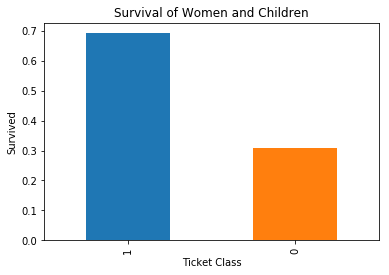

In [12]:
women_and_children_df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Survived')
plt.xlabel('Ticket Class')
plt.title('Survival of Women and Children')

Text(0.5,1,'Male Survival Count')

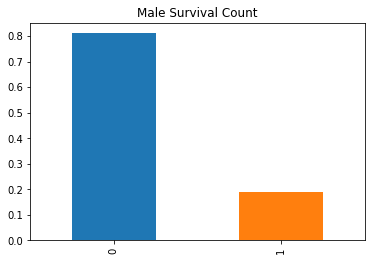

In [13]:
male_passengers['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Male Survival Count')

Well that seems like a pretty stark difference--it seems our intuition was correct!  Now, let's repeat the same process, but separating rich and poor passengers.  

In the cell below, create one DataFrame containing Fist Class passengers (`Pclass == 1`), and another DataFrame containing everyone else.

In [14]:
first_class_df = df.loc[df['Pclass'] == '1']
second_third_class_df = df.loc[df['Pclass'] != '1']

Now, create histograms of the surivival for each subgroup, just as we did above.  

Text(0.5,1,'First Class Survived')

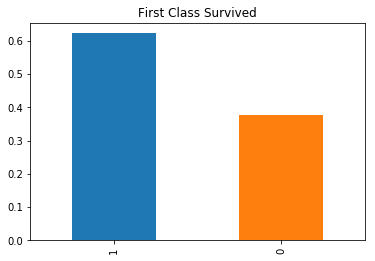

In [15]:
first_class_df.Survived.value_counts(normalize=True).plot(kind='bar')
plt.title('First Class Survived')

Text(0.5,1,'Second & Third Class Survived')

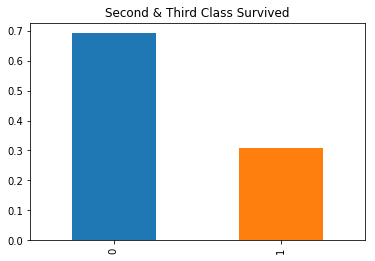

In [16]:
second_third_class_df.Survived.value_counts(normalize=True).plot(kind = 'bar')
plt.title('second & third Class Survived'.title())

To the surprise of absolutely no one, it seems like First Class passengers were more likely to survive than not, while 2nd and 3rd class passengers were more likely to die than not.  However, don't read too far into these graphs, as these aren't at the same scale, so they aren't fair comparisons.  

Slicing is a useful method for quickly getting DataFrames that contain only the examples we're looking for.  It's a quick, easy method that feels intuitive in Python, since we can rely on the same conditional logic that we would if we were just writing `if/else` statements.  

## Using the `.query()` method

Instead of slicing, we can also make use the DataFrame's built-in `.query()` method.  This method reads a bit cleaner, and allows us to pass in our arguments as a string.  For more information or example code on how to use this method, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html).

In the cell below, use the `.query()` method to slice a DataFrame that contains only passengers who have a `PassengerId` greater than or equal to 500. 

In [17]:
#query_string = query()
high_passenger_number_df = df.query('PassengerId > 500')
high_passenger_number_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
504,504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S


Just as with slicing, we can pass in queries with mutliple conditions.  One unique difference between using the `.query()` method and conditional slicing is that we can use `and` or `&` as well as `or` or `|` (for fun, try reading this last sentence out loud), while we are limited to the `&` and `|` symbols to denote and/or operations with conditional slicing.  

In the cell below, use the `query()` method to return a DataFrame that contains only female passengers under the age of 15 (exclusive). 

**_Hint_**: Although the entire query is a string, you'll still need to denote that `female` is also a string, within the string.  (String-Ception?)

In [18]:
female_children_df = df.query('Sex == "female" and Age < 15')
female_children_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
24,24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
39,39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


A cousin of the `query()` method, `eval()` allows us to use the same string-filled syntax as querying for creating new columns.  For instance:

```
some_df.eval('C = A + B')
```

would return a copy of the `some_df` dataframe, but will now include a column `C` where all values are equal to the sum of the `A` and `B` values for any given row.  This method also allows the user to specify if the operation should be done in place or not, providing a quick, easy syntax for simple feature engineering.  

In the cell below, use the DataFrame's `eval()` method in place to add a column called `Age_x_Fare`, and set it equal to `Age` multiplied by `Fare`.  

In [19]:
df.eval('Age_x_Fare = Age * Fare')

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_x_Fare
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2800.5750
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,42.1500
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,300.5991
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,420.9912


Great! Now, we'll move on the coolest part of this lab--querying DataFrames with SQL!

## Querying DataFrames With SQL

For this final section of the lab, we'll make use of the `pandasql` library.  Pandasql is a library designed to make it easy to query DataFrames directly wit SQL syntax, which was open-sourced by the company Yhat in late 2016.  It's very straightforward to use, but you are still encouraged to take a look at the [documentation](https://github.com/yhat/pandasql) as needed.  

We'll start by making sure the library is installed.  Run the cell below. 

In [20]:
!pip install pandasql

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


That should have installed everything correctly. This library has a few dependencies, which you should already have installed. If you don't, just `pip install` them in your terminal and you'll be good to go!

In the cell below, import `sqldf` from `pandasql`.

In [24]:
from pandasql import sqldf
from pandasql import sqldf

Great! Now, let's get some practice with this handy library.

`pandasql` allows us to pass in SQL queries in the form of a string to directly query our database.  Each time we make a query, we need pass in additional parameter that gives it access to the other variables in our session/environment.  We can use a lambda function to pass `locals()` or `globals()` so that we don't have to type this every time.  

In the cell below, create a variable called `pysqldf` and set it equal to a lambda function `q` that returns `sqldf(q, globals())`.  If you're unsure of how to do this, see the example in the [documentation](https://github.com/yhat/pandasql).

In [25]:
pysqldf = lambda q: sqldf(q, globals())

Great! That will save us from having to pass `globals()` as an argument every time we query, which can get a bit tedious.  

Let's write a basic query to get a list of passenger names from `df`, limit 10.  If you would prefer to format your query on multiple lines and style it as canonical SQL, that's fine--remember that multi-line strings in python are denoted by `"""`--for example:
```
"""
This is a 
Multi-Line String
"""
```

In the cell below, write a SQL query that returns the names of the first 10 passengers.

In [26]:
q = """ SELECT Name
    FROM df
    LIMIT 10; """

passenger_names = pysqldf(q)
passenger_names

OperationalError: (sqlite3.OperationalError) too many SQL variables [SQL: 'INSERT INTO df ("Unnamed: 0", "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: (0, 1, 0, '3', 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 7.25, None, 'S', 1, 2, 1, '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C', 2, 3, 1, '3', 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.925, None, 'S', 3, 4, 1, '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S', 4, 5, 0, '3', 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', 8.05, None, 'S', 5, 6, 0, '3', 'Moran, Mr. James', 'male', None, 0, 0, '330877', 8.4583, None, 'Q', 6, 7, 0, '1', 'McCarthy, Mr. Timothy J', 'male', 54.0, 0, 0, '17463', 51.8625, 'E46', 'S', 7, 8, 0, '3', 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 21.075, None, 'S', 8, 9, 1, '3', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', 11.1333, None, 'S', 9, 10, 1, '2', 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0, 1, 0, '237736', 30.0708, None, 'C', 10, 11, 1, '3', 'Sandstrom, Miss. Marguerite Rut', 'female', 4.0, 1, 1, 'PP 9549', 16.7, 'G6', 'S', 11, 12, 1, '1', 'Bonnell, Miss. Elizabeth', 'female', 58.0, 0, 0, '113783', 26.55, 'C103', 'S', 12, 13, 0, '3', 'Saundercock, Mr. William Henry', 'male', 20.0, 0, 0, 'A/5. 2151', 8.05, None, 'S', 13, 14, 0, '3', 'Andersson, Mr. Anders Johan', 'male', 39.0, 1, 5, '347082', 31.275, None, 'S', 14, 15, 0, '3', 'Vestrom, Miss. Hulda Amanda Adolfina', 'female', 14.0, 0, 0, '350406', 7.8542, None, 'S', 15, 16, 1, '2', 'Hewlett, Mrs. (Mary D Kingcome) ', 'female', 55.0, 0, 0, '248706', 16.0, None, 'S', 16, 17, 0, '3', 'Rice, Master. Eugene', 'male', 2.0, 4, 1, '382652', 29.125, None, 'Q', 17, 18, 1, '2', 'Williams, Mr. Charles Eugene', 'male', None, 0, 0, '244373', 13.0, None, 'S', 18, 19, 0, '3', 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'female', 31.0, 1, 0, '345763', 18.0, None, 'S', 19, 20, 1, '3', 'Masselmani, Mrs. Fatima', 'female', None, 0, 0, '2649', 7.225, None, 'C', 20, 21, 0, '2', 'Fynney, Mr. Joseph J', 'male', 35.0, 0, 0, '239865', 26.0, None, 'S', 21, 22, 1, '2', 'Beesley, Mr. Lawrence', 'male', 34.0, 0, 0, '248698', 13.0, 'D56', 'S', 22, 23, 1, '3', 'McGowan, Miss. Anna "Annie"', 'female', 15.0, 0, 0, '330923', 8.0292, None, 'Q', 23, 24, 1, '1', 'Sloper, Mr. William Thompson', 'male', 28.0, 0, 0, '113788', 35.5, 'A6', 'S', 24, 25, 0, '3', 'Palsson, Miss. Torborg Danira', 'female', 8.0, 3, 1, '349909', 21.075, None, 'S', 25, 26, 1, '2', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'female', 38.0, 1, 5, '347077', 31.3875, None, 'S', 26, 27, 0, '3', 'Emir, Mr. Farred Chehab', 'male', None, 0, 0, '2631', 7.225, None, 'C', 27, 28, 0, '1', 'Fortune, Mr. Charles Alexander', 'male', 19.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 28, 29, 1, '3', 'O\'Dwyer, Miss. Ellen "Nellie"', 'female', None, 0, 0, '330959', 7.8792, None, 'Q', 29, 30, 0, '3', 'Todoroff, Mr. Lalio', 'male', None, 0, 0, '349216', 7.8958, None, 'S', 30, 31, 0, '1', 'Uruchurtu, Don. Manuel E', 'male', 40.0, 0, 0, 'PC 17601', 27.7208, None, 'C', 31, 32, 1, '1', 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'female', None, 1, 0, 'PC 17569', 146.5208, 'B78', 'C', 32, 33, 1, '3', 'Glynn, Miss. Mary Agatha', 'female', None, 0, 0, '335677', 7.75, None, 'Q', 33, 34, 0, '2', 'Wheadon, Mr. Edward H', 'male', 66.0, 0, 0, 'C.A. 24579', 10.5, None, 'S', 34, 35, 0, '1', 'Meyer, Mr. Edgar Joseph', 'male', 28.0, 1, 0, 'PC 17604', 82.1708, None, 'C', 35, 36, 0, '1', 'Holverson, Mr. Alexander Oskar', 'male', 42.0, 1, 0, '113789', 52.0, None, 'S', 36, 37, 1, '3', 'Mamee, Mr. Hanna', 'male', None, 0, 0, '2677', 7.2292, None, 'C', 37, 38, 0, '3', 'Cann, Mr. Ernest Charles', 'male', 21.0, 0, 0, 'A./5. 2152', 8.05, None, 'S', 38, 39, 0, '3', 'Vander Planke, Miss. Augusta Maria', 'female', 18.0, 2, 0, '345764', 18.0, None, 'S', 39, 40, 1, '3', 'Nicola-Yarred, Miss. Jamila', 'female', 14.0, 1, 0, '2651', 11.2417, None, 'C', 40, 41, 0, '3', 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'female', 40.0, 1, 0, '7546', 9.475, None, 'S', 41, 42, 0, '2', 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)', 'female', 27.0, 1, 0, '11668', 21.0, None, 'S', 42, 43, 0, '3', 'Kraeff, Mr. Theodor', 'male', None, 0, 0, '349253', 7.8958, None, 'C', 43, 44, 1, '2', 'Laroche, Miss. Simonne Marie Anne Andree', 'female', 3.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 44, 45, 1, '3', 'Devaney, Miss. Margaret Delia', 'female', 19.0, 0, 0, '330958', 7.8792, None, 'Q', 45, 46, 0, '3', 'Rogers, Mr. William John', 'male', None, 0, 0, 'S.C./A.4. 23567', 8.05, None, 'S', 46, 47, 0, '3', 'Lennon, Mr. Denis', 'male', None, 1, 0, '370371', 15.5, None, 'Q', 47, 48, 1, '3', "O'Driscoll, Miss. Bridget", 'female', None, 0, 0, '14311', 7.75, None, 'Q', 48, 49, 0, '3', 'Samaan, Mr. Youssef', 'male', None, 2, 0, '2662', 21.6792, None, 'C', 49, 50, 0, '3', 'Arnold-Franchi, Mrs. Josef (Josefine Franchi)', 'female', 18.0, 1, 0, '349237', 17.8, None, 'S', 50, 51, 0, '3', 'Panula, Master. Juha Niilo', 'male', 7.0, 4, 1, '3101295', 39.6875, None, 'S', 51, 52, 0, '3', 'Nosworthy, Mr. Richard Cater', 'male', 21.0, 0, 0, 'A/4. 39886', 7.8, None, 'S', 52, 53, 1, '1', 'Harper, Mrs. Henry Sleeper (Myna Haxtun)', 'female', 49.0, 1, 0, 'PC 17572', 76.7292, 'D33', 'C', 53, 54, 1, '2', 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)', 'female', 29.0, 1, 0, '2926', 26.0, None, 'S', 54, 55, 0, '1', 'Ostby, Mr. Engelhart Cornelius', 'male', 65.0, 0, 1, '113509', 61.9792, 'B30', 'C', 55, 56, 1, '1', 'Woolner, Mr. Hugh', 'male', None, 0, 0, '19947', 35.5, 'C52', 'S', 56, 57, 1, '2', 'Rugg, Miss. Emily', 'female', 21.0, 0, 0, 'C.A. 31026', 10.5, None, 'S', 57, 58, 0, '3', 'Novel, Mr. Mansouer', 'male', 28.5, 0, 0, '2697', 7.2292, None, 'C', 58, 59, 1, '2', 'West, Miss. Constance Mirium', 'female', 5.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 59, 60, 0, '3', 'Goodwin, Master. William Frederick', 'male', 11.0, 5, 2, 'CA 2144', 46.9, None, 'S', 60, 61, 0, '3', 'Sirayanian, Mr. Orsen', 'male', 22.0, 0, 0, '2669', 7.2292, None, 'C', 61, 62, 1, '1', 'Icard, Miss. Amelie', 'female', 38.0, 0, 0, '113572', 80.0, 'B28', None, 62, 63, 0, '1', 'Harris, Mr. Henry Birkhardt', 'male', 45.0, 1, 0, '36973', 83.475, 'C83', 'S', 63, 64, 0, '3', 'Skoog, Master. Harald', 'male', 4.0, 3, 2, '347088', 27.9, None, 'S', 64, 65, 0, '1', 'Stewart, Mr. Albert A', 'male', None, 0, 0, 'PC 17605', 27.7208, None, 'C', 65, 66, 1, '3', 'Moubarek, Master. Gerios', 'male', None, 1, 1, '2661', 15.2458, None, 'C', 66, 67, 1, '2', 'Nye, Mrs. (Elizabeth Ramell)', 'female', 29.0, 0, 0, 'C.A. 29395', 10.5, 'F33', 'S', 67, 68, 0, '3', 'Crease, Mr. Ernest James', 'male', 19.0, 0, 0, 'S.P. 3464', 8.1583, None, 'S', 68, 69, 1, '3', 'Andersson, Miss. Erna Alexandra', 'female', 17.0, 4, 2, '3101281', 7.925, None, 'S', 69, 70, 0, '3', 'Kink, Mr. Vincenz', 'male', 26.0, 2, 0, '315151', 8.6625, None, 'S', 70, 71, 0, '2', 'Jenkin, Mr. Stephen Curnow', 'male', 32.0, 0, 0, 'C.A. 33111', 10.5, None, 'S', 71, 72, 0, '3', 'Goodwin, Miss. Lillian Amy', 'female', 16.0, 5, 2, 'CA 2144', 46.9, None, 'S', 72, 73, 0, '2', 'Hood, Mr. Ambrose Jr', 'male', 21.0, 0, 0, 'S.O.C. 14879', 73.5, None, 'S', 73, 74, 0, '3', 'Chronopoulos, Mr. Apostolos', 'male', 26.0, 1, 0, '2680', 14.4542, None, 'C', 74, 75, 1, '3', 'Bing, Mr. Lee', 'male', 32.0, 0, 0, '1601', 56.4958, None, 'S', 75, 76, 0, '3', 'Moen, Mr. Sigurd Hansen', 'male', 25.0, 0, 0, '348123', 7.65, 'F G73', 'S', 76, 77, 0, '3', 'Staneff, Mr. Ivan', 'male', None, 0, 0, '349208', 7.8958, None, 'S', 77, 78, 0, '3', 'Moutal, Mr. Rahamin Haim', 'male', None, 0, 0, '374746', 8.05, None, 'S', 78, 79, 1, '2', 'Caldwell, Master. Alden Gates', 'male', 0.83, 0, 2, '248738', 29.0, None, 'S', 79, 80, 1, '3', 'Dowdell, Miss. Elizabeth', 'female', 30.0, 0, 0, '364516', 12.475, None, 'S', 80, 81, 0, '3', 'Waelens, Mr. Achille', 'male', 22.0, 0, 0, '345767', 9.0, None, 'S', 81, 82, 1, '3', 'Sheerlinck, Mr. Jan Baptist', 'male', 29.0, 0, 0, '345779', 9.5, None, 'S', 82, 83, 1, '3', 'McDermott, Miss. Brigdet Delia', 'female', None, 0, 0, '330932', 7.7875, None, 'Q', 83, 84, 0, '1', 'Carrau, Mr. Francisco M', 'male', 28.0, 0, 0, '113059', 47.1, None, 'S', 84, 85, 1, '2', 'Ilett, Miss. Bertha', 'female', 17.0, 0, 0, 'SO/C 14885', 10.5, None, 'S', 85, 86, 1, '3', 'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)', 'female', 33.0, 3, 0, '3101278', 15.85, None, 'S', 86, 87, 0, '3', 'Ford, Mr. William Neal', 'male', 16.0, 1, 3, 'W./C. 6608', 34.375, None, 'S', 87, 88, 0, '3', 'Slocovski, Mr. Selman Francis', 'male', None, 0, 0, 'SOTON/OQ 392086', 8.05, None, 'S', 88, 89, 1, '1', 'Fortune, Miss. Mabel Helen', 'female', 23.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 89, 90, 0, '3', 'Celotti, Mr. Francesco', 'male', 24.0, 0, 0, '343275', 8.05, None, 'S', 90, 91, 0, '3', 'Christmann, Mr. Emil', 'male', 29.0, 0, 0, '343276', 8.05, None, 'S', 91, 92, 0, '3', 'Andreasson, Mr. Paul Edvin', 'male', 20.0, 0, 0, '347466', 7.8542, None, 'S', 92, 93, 0, '1', 'Chaffee, Mr. Herbert Fuller', 'male', 46.0, 1, 0, 'W.E.P. 5734', 61.175, 'E31', 'S', 93, 94, 0, '3', 'Dean, Mr. Bertram Frank', 'male', 26.0, 1, 2, 'C.A. 2315', 20.575, None, 'S', 94, 95, 0, '3', 'Coxon, Mr. Daniel', 'male', 59.0, 0, 0, '364500', 7.25, None, 'S', 95, 96, 0, '3', 'Shorney, Mr. Charles Joseph', 'male', None, 0, 0, '374910', 8.05, None, 'S', 96, 97, 0, '1', 'Goldschmidt, Mr. George B', 'male', 71.0, 0, 0, 'PC 17754', 34.6542, 'A5', 'C', 97, 98, 1, '1', 'Greenfield, Mr. William Bertram', 'male', 23.0, 0, 1, 'PC 17759', 63.3583, 'D10 D12', 'C', 98, 99, 1, '2', 'Doling, Mrs. John T (Ada Julia Bone)', 'female', 34.0, 0, 1, '231919', 23.0, None, 'S', 99, 100, 0, '2', 'Kantor, Mr. Sinai', 'male', 34.0, 1, 0, '244367', 26.0, None, 'S', 100, 101, 0, '3', 'Petranec, Miss. Matilda', 'female', 28.0, 0, 0, '349245', 7.8958, None, 'S', 101, 102, 0, '3', 'Petroff, Mr. Pastcho ("Pentcho")', 'male', None, 0, 0, '349215', 7.8958, None, 'S', 102, 103, 0, '1', 'White, Mr. Richard Frasar', 'male', 21.0, 0, 1, '35281', 77.2875, 'D26', 'S', 103, 104, 0, '3', 'Johansson, Mr. Gustaf Joel', 'male', 33.0, 0, 0, '7540', 8.6542, None, 'S', 104, 105, 0, '3', 'Gustafsson, Mr. Anders Vilhelm', 'male', 37.0, 2, 0, '3101276', 7.925, None, 'S', 105, 106, 0, '3', 'Mionoff, Mr. Stoytcho', 'male', 28.0, 0, 0, '349207', 7.8958, None, 'S', 106, 107, 1, '3', 'Salkjelsvik, Miss. Anna Kristine', 'female', 21.0, 0, 0, '343120', 7.65, None, 'S', 107, 108, 1, '3', 'Moss, Mr. Albert Johan', 'male', None, 0, 0, '312991', 7.775, None, 'S', 108, 109, 0, '3', 'Rekic, Mr. Tido', 'male', 38.0, 0, 0, '349249', 7.8958, None, 'S', 109, 110, 1, '3', 'Moran, Miss. Bertha', 'female', None, 1, 0, '371110', 24.15, None, 'Q', 110, 111, 0, '1', 'Porter, Mr. Walter Chamberlain', 'male', 47.0, 0, 0, '110465', 52.0, 'C110', 'S', 111, 112, 0, '3', 'Zabour, Miss. Hileni', 'female', 14.5, 1, 0, '2665', 14.4542, None, 'C', 112, 113, 0, '3', 'Barton, Mr. David John', 'male', 22.0, 0, 0, '324669', 8.05, None, 'S', 113, 114, 0, '3', 'Jussila, Miss. Katriina', 'female', 20.0, 1, 0, '4136', 9.825, None, 'S', 114, 115, 0, '3', 'Attalah, Miss. Malake', 'female', 17.0, 0, 0, '2627', 14.4583, None, 'C', 115, 116, 0, '3', 'Pekoniemi, Mr. Edvard', 'male', 21.0, 0, 0, 'STON/O 2. 3101294', 7.925, None, 'S', 116, 117, 0, '3', 'Connors, Mr. Patrick', 'male', 70.5, 0, 0, '370369', 7.75, None, 'Q', 117, 118, 0, '2', 'Turpin, Mr. William John Robert', 'male', 29.0, 1, 0, '11668', 21.0, None, 'S', 118, 119, 0, '1', 'Baxter, Mr. Quigg Edmond', 'male', 24.0, 0, 1, 'PC 17558', 247.5208, 'B58 B60', 'C', 119, 120, 0, '2', 'Andersson, Miss. Ellis Anna Maria', 'female', 2.0, 4, 2, '347082', 31.275, None, 'S', 120, 121, 0, '2', 'Hickman, Mr. Stanley George', 'male', 21.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 121, 122, 0, '3', 'Moore, Mr. Leonard Charles', 'male', None, 0, 0, 'A4. 54510', 8.05, None, 'S', 122, 123, 0, '2', 'Nasser, Mr. Nicholas', 'male', 32.5, 1, 0, '237736', 30.0708, None, 'C', 123, 124, 1, '2', 'Webber, Miss. Susan', 'female', 32.5, 0, 0, '27267', 13.0, 'E101', 'S', 124, 125, 0, '1', 'White, Mr. Percival Wayland', 'male', 54.0, 0, 1, '35281', 77.2875, 'D26', 'S', 125, 126, 1, '3', 'Nicola-Yarred, Master. Elias', 'male', 12.0, 1, 0, '2651', 11.2417, None, 'C', 126, 127, 0, '3', 'McMahon, Mr. Martin', 'male', None, 0, 0, '370372', 7.75, None, 'Q', 127, 128, 1, '3', 'Madsen, Mr. Fridtjof Arne', 'male', 24.0, 0, 0, 'C 17369', 7.1417, None, 'S', 128, 129, 1, '3', 'Peter, Miss. Anna', 'female', None, 1, 1, '2668', 22.3583, 'F E69', 'C', 129, 130, 0, '3', 'Ekstrom, Mr. Johan', 'male', 45.0, 0, 0, '347061', 6.975, None, 'S', 130, 131, 0, '3', 'Drazenoic, Mr. Jozef', 'male', 33.0, 0, 0, '349241', 7.8958, None, 'C', 131, 132, 0, '3', 'Coelho, Mr. Domingos Fernandeo', 'male', 20.0, 0, 0, 'SOTON/O.Q. 3101307', 7.05, None, 'S', 132, 133, 0, '3', 'Robins, Mrs. Alexander A (Grace Charity Laury)', 'female', 47.0, 1, 0, 'A/5. 3337', 14.5, None, 'S', 133, 134, 1, '2', 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)', 'female', 29.0, 1, 0, '228414', 26.0, None, 'S', 134, 135, 0, '2', 'Sobey, Mr. Samuel James Hayden', 'male', 25.0, 0, 0, 'C.A. 29178', 13.0, None, 'S', 135, 136, 0, '2', 'Richard, Mr. Emile', 'male', 23.0, 0, 0, 'SC/PARIS 2133', 15.0458, None, 'C', 136, 137, 1, '1', 'Newsom, Miss. Helen Monypeny', 'female', 19.0, 0, 2, '11752', 26.2833, 'D47', 'S', 137, 138, 0, '1', 'Futrelle, Mr. Jacques Heath', 'male', 37.0, 1, 0, '113803', 53.1, 'C123', 'S', 138, 139, 0, '3', 'Osen, Mr. Olaf Elon', 'male', 16.0, 0, 0, '7534', 9.2167, None, 'S', 139, 140, 0, '1', 'Giglio, Mr. Victor', 'male', 24.0, 0, 0, 'PC 17593', 79.2, 'B86', 'C', 140, 141, 0, '3', 'Boulos, Mrs. Joseph (Sultana)', 'female', None, 0, 2, '2678', 15.2458, None, 'C', 141, 142, 1, '3', 'Nysten, Miss. Anna Sofia', 'female', 22.0, 0, 0, '347081', 7.75, None, 'S', 142, 143, 1, '3', 'Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)', 'female', 24.0, 1, 0, 'STON/O2. 3101279', 15.85, None, 'S', 143, 144, 0, '3', 'Burke, Mr. Jeremiah', 'male', 19.0, 0, 0, '365222', 6.75, None, 'Q', 144, 145, 0, '2', 'Andrew, Mr. Edgardo Samuel', 'male', 18.0, 0, 0, '231945', 11.5, None, 'S', 145, 146, 0, '2', 'Nicholls, Mr. Joseph Charles', 'male', 19.0, 1, 1, 'C.A. 33112', 36.75, None, 'S', 146, 147, 1, '3', 'Andersson, Mr. August Edvard ("Wennerstrom")', 'male', 27.0, 0, 0, '350043', 7.7958, None, 'S', 147, 148, 0, '3', 'Ford, Miss. Robina Maggie "Ruby"', 'female', 9.0, 2, 2, 'W./C. 6608', 34.375, None, 'S', 148, 149, 0, '2', 'Navratil, Mr. Michel ("Louis M Hoffman")', 'male', 36.5, 0, 2, '230080', 26.0, 'F2', 'S', 149, 150, 0, '2', 'Byles, Rev. Thomas Roussel Davids', 'male', 42.0, 0, 0, '244310', 13.0, None, 'S', 150, 151, 0, '2', 'Bateman, Rev. Robert James', 'male', 51.0, 0, 0, 'S.O.P. 1166', 12.525, None, 'S', 151, 152, 1, '1', 'Pears, Mrs. Thomas (Edith Wearne)', 'female', 22.0, 1, 0, '113776', 66.6, 'C2', 'S', 152, 153, 0, '3', 'Meo, Mr. Alfonzo', 'male', 55.5, 0, 0, 'A.5. 11206', 8.05, None, 'S', 153, 154, 0, '3', 'van Billiard, Mr. Austin Blyler', 'male', 40.5, 0, 2, 'A/5. 851', 14.5, None, 'S', 154, 155, 0, '3', 'Olsen, Mr. Ole Martin', 'male', None, 0, 0, 'Fa 265302', 7.3125, None, 'S', 155, 156, 0, '1', 'Williams, Mr. Charles Duane', 'male', 51.0, 0, 1, 'PC 17597', 61.3792, None, 'C', 156, 157, 1, '3', 'Gilnagh, Miss. Katherine "Katie"', 'female', 16.0, 0, 0, '35851', 7.7333, None, 'Q', 157, 158, 0, '3', 'Corn, Mr. Harry', 'male', 30.0, 0, 0, 'SOTON/OQ 392090', 8.05, None, 'S', 158, 159, 0, '3', 'Smiljanic, Mr. Mile', 'male', None, 0, 0, '315037', 8.6625, None, 'S', 159, 160, 0, '3', 'Sage, Master. Thomas Henry', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 160, 161, 0, '3', 'Cribb, Mr. John Hatfield', 'male', 44.0, 0, 1, '371362', 16.1, None, 'S', 161, 162, 1, '2', 'Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)', 'female', 40.0, 0, 0, 'C.A. 33595', 15.75, None, 'S', 162, 163, 0, '3', 'Bengtsson, Mr. John Viktor', 'male', 26.0, 0, 0, '347068', 7.775, None, 'S', 163, 164, 0, '3', 'Calic, Mr. Jovo', 'male', 17.0, 0, 0, '315093', 8.6625, None, 'S', 164, 165, 0, '3', 'Panula, Master. Eino Viljami', 'male', 1.0, 4, 1, '3101295', 39.6875, None, 'S', 165, 166, 1, '3', 'Goldsmith, Master. Frank John William "Frankie"', 'male', 9.0, 0, 2, '363291', 20.525, None, 'S', 166, 167, 1, '1', 'Chibnall, Mrs. (Edith Martha Bowerman)', 'female', None, 0, 1, '113505', 55.0, 'E33', 'S', 167, 168, 0, '3', 'Skoog, Mrs. William (Anna Bernhardina Karlsson)', 'female', 45.0, 1, 4, '347088', 27.9, None, 'S', 168, 169, 0, '1', 'Baumann, Mr. John D', 'male', None, 0, 0, 'PC 17318', 25.925, None, 'S', 169, 170, 0, '3', 'Ling, Mr. Lee', 'male', 28.0, 0, 0, '1601', 56.4958, None, 'S', 170, 171, 0, '1', 'Van der hoef, Mr. Wyckoff', 'male', 61.0, 0, 0, '111240', 33.5, 'B19', 'S', 171, 172, 0, '3', 'Rice, Master. Arthur', 'male', 4.0, 4, 1, '382652', 29.125, None, 'Q', 172, 173, 1, '3', 'Johnson, Miss. Eleanor Ileen', 'female', 1.0, 1, 1, '347742', 11.1333, None, 'S', 173, 174, 0, '3', 'Sivola, Mr. Antti Wilhelm', 'male', 21.0, 0, 0, 'STON/O 2. 3101280', 7.925, None, 'S', 174, 175, 0, '1', 'Smith, Mr. James Clinch', 'male', 56.0, 0, 0, '17764', 30.6958, 'A7', 'C', 175, 176, 0, '3', 'Klasen, Mr. Klas Albin', 'male', 18.0, 1, 1, '350404', 7.8542, None, 'S', 176, 177, 0, '3', 'Lefebre, Master. Henry Forbes', 'male', None, 3, 1, '4133', 25.4667, None, 'S', 177, 178, 0, '1', 'Isham, Miss. Ann Elizabeth', 'female', 50.0, 0, 0, 'PC 17595', 28.7125, 'C49', 'C', 178, 179, 0, '2', 'Hale, Mr. Reginald', 'male', 30.0, 0, 0, '250653', 13.0, None, 'S', 179, 180, 0, '3', 'Leonard, Mr. Lionel', 'male', 36.0, 0, 0, 'LINE', 0.0, None, 'S', 180, 181, 0, '1', 'Sage, Miss. Constance Gladys', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 181, 182, 0, '2', 'Pernot, Mr. Rene', 'male', None, 0, 0, 'SC/PARIS 2131', 15.05, None, 'C', 182, 183, 0, '3', 'Asplund, Master. Clarence Gustaf Hugo', 'male', 9.0, 4, 2, '347077', 31.3875, None, 'S', 183, 184, 1, '2', 'Becker, Master. Richard F', 'male', 1.0, 2, 1, '230136', 39.0, 'F4', 'S', 184, 185, 1, '3', 'Kink-Heilmann, Miss. Luise Gretchen', 'female', 4.0, 0, 2, '315153', 22.025, None, 'S', 185, 186, 0, '1', 'Rood, Mr. Hugh Roscoe', 'male', None, 0, 0, '113767', 50.0, 'A32', 'S', 186, 187, 1, '3', 'O\'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)', 'female', None, 1, 0, '370365', 15.5, None, 'Q', 187, 188, 1, '1', 'Romaine, Mr. Charles Hallace ("Mr C Rolmane")', 'male', 45.0, 0, 0, '111428', 26.55, None, 'S', 188, 189, 0, '3', 'Bourke, Mr. John', 'male', 40.0, 1, 1, '364849', 15.5, None, 'Q', 189, 190, 0, '3', 'Turcin, Mr. Stjepan', 'male', 36.0, 0, 0, '349247', 7.8958, None, 'S', 190, 191, 1, '2', 'Pinsky, Mrs. (Rosa)', 'female', 32.0, 0, 0, '234604', 13.0, None, 'S', 191, 192, 0, '2', 'Carbines, Mr. William', 'male', 19.0, 0, 0, '28424', 13.0, None, 'S', 192, 193, 1, '3', 'Andersen-Jensen, Miss. Carla Christine Nielsine', 'female', 19.0, 1, 0, '350046', 7.8542, None, 'S', 193, 194, 1, '2', 'Navratil, Master. Michel M', 'male', 3.0, 1, 1, '230080', 26.0, 'F2', 'S', 194, 195, 1, '1', 'Brown, Mrs. James Joseph (Margaret Tobin)', 'female', 44.0, 0, 0, 'PC 17610', 27.7208, 'B4', 'C', 195, 196, 1, '1', 'Lurette, Miss. Elise', 'female', 58.0, 0, 0, 'PC 17569', 146.5208, 'B80', 'C', 196, 197, 0, '3', 'Mernagh, Mr. Robert', 'male', None, 0, 0, '368703', 7.75, None, 'Q', 197, 198, 0, '3', 'Olsen, Mr. Karl Siegwart Andreas', 'male', 42.0, 0, 1, '4579', 8.4042, None, 'S', 198, 199, 1, '3', 'Madigan, Miss. Margaret "Maggie"', 'female', None, 0, 0, '370370', 7.75, None, 'Q', 199, 200, 0, '2', 'Yrois, Miss. Henriette ("Mrs Harbeck")', 'female', 24.0, 0, 0, '248747', 13.0, None, 'S', 200, 201, 0, '3', 'Vande Walle, Mr. Nestor Cyriel', 'male', 28.0, 0, 0, '345770', 9.5, None, 'S', 201, 202, 0, '3', 'Sage, Mr. Frederick', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 202, 203, 0, '3', 'Johanson, Mr. Jakob Alfred', 'male', 34.0, 0, 0, '3101264', 6.4958, None, 'S', 203, 204, 0, '3', 'Youseff, Mr. Gerious', 'male', 45.5, 0, 0, '2628', 7.225, None, 'C', 204, 205, 1, '3', 'Cohen, Mr. Gurshon "Gus"', 'male', 18.0, 0, 0, 'A/5 3540', 8.05, None, 'S', 205, 206, 0, '3', 'Strom, Miss. Telma Matilda', 'female', 2.0, 0, 1, '347054', 10.4625, 'G6', 'S', 206, 207, 0, '3', 'Backstrom, Mr. Karl Alfred', 'male', 32.0, 1, 0, '3101278', 15.85, None, 'S', 207, 208, 1, '3', 'Albimona, Mr. Nassef Cassem', 'male', 26.0, 0, 0, '2699', 18.7875, None, 'C', 208, 209, 1, '3', 'Carr, Miss. Helen "Ellen"', 'female', 16.0, 0, 0, '367231', 7.75, None, 'Q', 209, 210, 1, '1', 'Blank, Mr. Henry', 'male', 40.0, 0, 0, '112277', 31.0, 'A31', 'C', 210, 211, 0, '3', 'Ali, Mr. Ahmed', 'male', 24.0, 0, 0, 'SOTON/O.Q. 3101311', 7.05, None, 'S', 211, 212, 1, '2', 'Cameron, Miss. Clear Annie', 'female', 35.0, 0, 0, 'F.C.C. 13528', 21.0, None, 'S', 212, 213, 0, '3', 'Perkin, Mr. John Henry', 'male', 22.0, 0, 0, 'A/5 21174', 7.25, None, 'S', 213, 214, 0, '2', 'Givard, Mr. Hans Kristensen', 'male', 30.0, 0, 0, '250646', 13.0, None, 'S', 214, 215, 0, '3', 'Kiernan, Mr. Philip', 'male', None, 1, 0, '367229', 7.75, None, 'Q', 215, 216, 1, '1', 'Newell, Miss. Madeleine', 'female', 31.0, 1, 0, '35273', 113.275, 'D36', 'C', 216, 217, 1, '3', 'Honkanen, Miss. Eliina', 'female', 27.0, 0, 0, 'STON/O2. 3101283', 7.925, None, 'S', 217, 218, 0, '2', 'Jacobsohn, Mr. Sidney Samuel', 'male', 42.0, 1, 0, '243847', 27.0, None, 'S', 218, 219, 1, '1', 'Bazzani, Miss. Albina', 'female', 32.0, 0, 0, '11813', 76.2917, 'D15', 'C', 219, 220, 0, '2', 'Harris, Mr. Walter', 'male', 30.0, 0, 0, 'W/C 14208', 10.5, None, 'S', 220, 221, 1, '3', 'Sunderland, Mr. Victor Francis', 'male', 16.0, 0, 0, 'SOTON/OQ 392089', 8.05, None, 'S', 221, 222, 0, '3', 'Bracken, Mr. James H', 'male', 27.0, 0, 0, '220367', 13.0, None, 'S', 222, 223, 0, '3', 'Green, Mr. George Henry', 'male', 51.0, 0, 0, '21440', 8.05, None, 'S', 223, 224, 0, '3', 'Nenkoff, Mr. Christo', 'male', None, 0, 0, '349234', 7.8958, None, 'S', 224, 225, 1, '1', 'Hoyt, Mr. Frederick Maxfield', 'male', 38.0, 1, 0, '19943', 90.0, 'C93', 'S', 225, 226, 0, '3', 'Berglund, Mr. Karl Ivar Sven', 'male', 22.0, 0, 0, 'PP 4348', 9.35, None, 'S', 226, 227, 1, '2', 'Mellors, Mr. William John', 'male', 19.0, 0, 0, 'SW/PP 751', 10.5, None, 'S', 227, 228, 0, '3', 'Lovell, Mr. John Hall ("Henry")', 'male', 20.5, 0, 0, 'A/5 21173', 7.25, None, 'S', 228, 229, 0, '2', 'Fahlstrom, Mr. Arne Jonas', 'male', 18.0, 0, 0, '236171', 13.0, None, 'S', 229, 230, 0, '3', 'Lefebre, Miss. Mathilde', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 230, 231, 1, '1', 'Harris, Mrs. Henry Birkhardt (Irene Wallach)', 'female', 35.0, 1, 0, '36973', 83.475, 'C83', 'S', 231, 232, 0, '3', 'Larsson, Mr. Bengt Edvin', 'male', 29.0, 0, 0, '347067', 7.775, None, 'S', 232, 233, 0, '2', 'Sjostedt, Mr. Ernst Adolf', 'male', 59.0, 0, 0, '237442', 13.5, None, 'S', 233, 234, 1, '3', 'Asplund, Miss. Lillian Gertrud', 'female', 5.0, 4, 2, '347077', 31.3875, None, 'S', 234, 235, 0, '2', 'Leyson, Mr. Robert William Norman', 'male', 24.0, 0, 0, 'C.A. 29566', 10.5, None, 'S', 235, 236, 0, '3', 'Harknett, Miss. Alice Phoebe', 'female', None, 0, 0, 'W./C. 6609', 7.55, None, 'S', 236, 237, 0, '2', 'Hold, Mr. Stephen', 'male', 44.0, 1, 0, '26707', 26.0, None, 'S', 237, 238, 1, '2', 'Collyer, Miss. Marjorie "Lottie"', 'female', 8.0, 0, 2, 'C.A. 31921', 26.25, None, 'S', 238, 239, 0, '2', 'Pengelly, Mr. Frederick William', 'male', 19.0, 0, 0, '28665', 10.5, None, 'S', 239, 240, 0, '2', 'Hunt, Mr. George Henry', 'male', 33.0, 0, 0, 'SCO/W 1585', 12.275, None, 'S', 240, 241, 0, '3', 'Zabour, Miss. Thamine', 'female', None, 1, 0, '2665', 14.4542, None, 'C', 241, 242, 1, '3', 'Murphy, Miss. Katherine "Kate"', 'female', None, 1, 0, '367230', 15.5, None, 'Q', 242, 243, 0, '2', 'Coleridge, Mr. Reginald Charles', 'male', 29.0, 0, 0, 'W./C. 14263', 10.5, None, 'S', 243, 244, 0, '3', 'Maenpaa, Mr. Matti Alexanteri', 'male', 22.0, 0, 0, 'STON/O 2. 3101275', 7.125, None, 'S', 244, 245, 0, '3', 'Attalah, Mr. Sleiman', 'male', 30.0, 0, 0, '2694', 7.225, None, 'C', 245, 246, 0, '1', 'Minahan, Dr. William Edward', 'male', 44.0, 2, 0, '19928', 90.0, 'C78', 'Q', 246, 247, 0, '3', 'Lindahl, Miss. Agda Thorilda Viktoria', 'female', 25.0, 0, 0, '347071', 7.775, None, 'S', 247, 248, 1, '2', 'Hamalainen, Mrs. William (Anna)', 'female', 24.0, 0, 2, '250649', 14.5, None, 'S', 248, 249, 1, '1', 'Beckwith, Mr. Richard Leonard', 'male', 37.0, 1, 1, '11751', 52.5542, 'D35', 'S', 249, 250, 0, '2', 'Carter, Rev. Ernest Courtenay', 'male', 54.0, 1, 0, '244252', 26.0, None, 'S', 250, 251, 0, '3', 'Reed, Mr. James George', 'male', None, 0, 0, '362316', 7.25, None, 'S', 251, 252, 0, '3', 'Strom, Mrs. Wilhelm (Elna Matilda Persson)', 'female', 29.0, 1, 1, '347054', 10.4625, 'G6', 'S', 252, 253, 0, '1', 'Stead, Mr. William Thomas', 'male', 62.0, 0, 0, '113514', 26.55, 'C87', 'S', 253, 254, 0, '3', 'Lobb, Mr. William Arthur', 'male', 30.0, 1, 0, 'A/5. 3336', 16.1, None, 'S', 254, 255, 0, '3', 'Rosblom, Mrs. Viktor (Helena Wilhelmina)', 'female', 41.0, 0, 2, '370129', 20.2125, None, 'S', 255, 256, 1, '3', 'Touma, Mrs. Darwis (Hanne Youssef Razi)', 'female', 29.0, 0, 2, '2650', 15.2458, None, 'C', 256, 257, 1, '1', 'Thorne, Mrs. Gertrude Maybelle', 'female', None, 0, 0, 'PC 17585', 79.2, None, 'C', 257, 258, 1, '1', 'Cherry, Miss. Gladys', 'female', 30.0, 0, 0, '110152', 86.5, 'B77', 'S', 258, 259, 1, '1', 'Ward, Miss. Anna', 'female', 35.0, 0, 0, 'PC 17755', 512.3292, None, 'C', 259, 260, 1, '2', 'Parrish, Mrs. (Lutie Davis)', 'female', 50.0, 0, 1, '230433', 26.0, None, 'S', 260, 261, 0, '3', 'Smith, Mr. Thomas', 'male', None, 0, 0, '384461', 7.75, None, 'Q', 261, 262, 1, '3', 'Asplund, Master. Edvin Rojj Felix', 'male', 3.0, 4, 2, '347077', 31.3875, None, 'S', 262, 263, 0, '1', 'Taussig, Mr. Emil', 'male', 52.0, 1, 1, '110413', 79.65, 'E67', 'S', 263, 264, 0, '1', 'Harrison, Mr. William', 'male', 40.0, 0, 0, '112059', 0.0, 'B94', 'S', 264, 265, 0, '3', 'Henry, Miss. Delia', 'female', None, 0, 0, '382649', 7.75, None, 'Q', 265, 266, 0, '2', 'Reeves, Mr. David', 'male', 36.0, 0, 0, 'C.A. 17248', 10.5, None, 'S', 266, 267, 0, '3', 'Panula, Mr. Ernesti Arvid', 'male', 16.0, 4, 1, '3101295', 39.6875, None, 'S', 267, 268, 1, '3', 'Persson, Mr. Ernst Ulrik', 'male', 25.0, 1, 0, '347083', 7.775, None, 'S', 268, 269, 1, '1', 'Graham, Mrs. William Thompson (Edith Junkins)', 'female', 58.0, 0, 1, 'PC 17582', 153.4625, 'C125', 'S', 269, 270, 1, '1', 'Bissette, Miss. Amelia', 'female', 35.0, 0, 0, 'PC 17760', 135.6333, 'C99', 'S', 270, 271, 0, '1', 'Cairns, Mr. Alexander', 'male', None, 0, 0, '113798', 31.0, None, 'S', 271, 272, 1, '3', 'Tornquist, Mr. William Henry', 'male', 25.0, 0, 0, 'LINE', 0.0, None, 'S', 272, 273, 1, '3', 'Mellinger, Mrs. (Elizabeth Anne Maidment)', 'female', 41.0, 0, 1, '250644', 19.5, None, 'S', 273, 274, 0, '1', 'Natsch, Mr. Charles H', 'male', 37.0, 0, 1, 'PC 17596', 29.7, 'C118', 'C', 274, 275, 1, '3', 'Healy, Miss. Hanora "Nora"', 'female', None, 0, 0, '370375', 7.75, None, 'Q', 275, 276, 1, '1', 'Andrews, Miss. Kornelia Theodosia', 'female', 63.0, 1, 0, '13502', 77.9583, 'D7', 'S', 276, 277, 0, '3', 'Lindblom, Miss. Augusta Charlotta', 'female', 45.0, 0, 0, '347073', 7.75, None, 'S', 277, 278, 0, '2', 'Parkes, Mr. Francis "Frank"', 'male', None, 0, 0, '239853', 0.0, None, 'S', 278, 279, 0, '3', 'Rice, Master. Eric', 'male', 7.0, 4, 1, '382652', 29.125, None, 'Q', 279, 280, 1, '3', 'Abbott, Mrs. Stanton (Rosa Hunt)', 'female', 35.0, 1, 1, 'C.A. 2673', 20.25, None, 'S', 280, 281, 0, '3', 'Duane, Mr. Frank', 'male', 65.0, 0, 0, '336439', 7.75, None, 'Q', 281, 282, 0, '3', 'Olsson, Mr. Nils Johan Goransson', 'male', 28.0, 0, 0, '347464', 7.8542, None, 'S', 282, 283, 0, '3', 'de Pelsmaeker, Mr. Alfons', 'male', 16.0, 0, 0, '345778', 9.5, None, 'S', 283, 284, 1, '3', 'Dorking, Mr. Edward Arthur', 'male', 19.0, 0, 0, 'A/5. 10482', 8.05, None, 'S', 284, 285, 0, '2', 'Smith, Mr. Richard William', 'male', None, 0, 0, '113056', 26.0, 'A19', 'S', 285, 286, 0, '3', 'Stankovic, Mr. Ivan', 'male', 33.0, 0, 0, '349239', 8.6625, None, 'C', 286, 287, 1, '3', 'de Mulder, Mr. Theodore', 'male', 30.0, 0, 0, '345774', 9.5, None, 'S', 287, 288, 0, '3', 'Naidenoff, Mr. Penko', 'male', 22.0, 0, 0, '349206', 7.8958, None, 'S', 288, 289, 1, '2', 'Hosono, Mr. Masabumi', 'male', 42.0, 0, 0, '237798', 13.0, None, 'S', 289, 290, 1, '3', 'Connolly, Miss. Kate', 'female', 22.0, 0, 0, '370373', 7.75, None, 'Q', 290, 291, 1, '1', 'Barber, Miss. Ellen "Nellie"', 'female', 26.0, 0, 0, '19877', 78.85, None, 'S', 291, 292, 1, '1', 'Bishop, Mrs. Dickinson H (Helen Walton)', 'female', 19.0, 1, 0, '11967', 91.0792, 'B49', 'C', 292, 293, 0, '3', 'Levy, Mr. Rene Jacques', 'male', 36.0, 0, 0, 'SC/Paris 2163', 12.875, 'D', 'C', 293, 294, 0, '3', 'Haas, Miss. Aloisia', 'female', 24.0, 0, 0, '349236', 8.85, None, 'S', 294, 295, 0, '3', 'Mineff, Mr. Ivan', 'male', 24.0, 0, 0, '349233', 7.8958, None, 'S', 295, 296, 0, '1', 'Lewy, Mr. Ervin G', 'male', None, 0, 0, 'PC 17612', 27.7208, None, 'C', 296, 297, 0, '3', 'Hanna, Mr. Mansour', 'male', 23.5, 0, 0, '2693', 7.2292, None, 'C', 297, 298, 0, '1', 'Allison, Miss. Helen Loraine', 'female', 2.0, 1, 2, '113781', 151.55, 'C22 C26', 'S', 298, 299, 1, '2', 'Saalfeld, Mr. Adolphe', 'male', None, 0, 0, '19988', 30.5, 'C106', 'S', 299, 300, 1, '1', 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)', 'female', 50.0, 0, 1, 'PC 17558', 247.5208, 'B58 B60', 'C', 300, 301, 1, '3', 'Kelly, Miss. Anna Katherine "Annie Kate"', 'female', None, 0, 0, '9234', 7.75, None, 'Q', 301, 302, 1, '3', 'McCoy, Mr. Bernard', 'male', None, 2, 0, '367226', 23.25, None, 'Q', 302, 303, 0, '3', 'Johnson, Mr. William Cahoone Jr', 'male', 19.0, 0, 0, 'LINE', 0.0, None, 'S', 303, 304, 1, '2', 'Keane, Miss. Nora A', 'female', None, 0, 0, '226593', 12.35, 'E101', 'Q', 304, 305, 0, '3', 'Williams, Mr. Howard Hugh "Harry"', 'male', None, 0, 0, 'A/5 2466', 8.05, None, 'S', 305, 306, 1, '1', 'Allison, Master. Hudson Trevor', 'male', 0.92, 1, 2, '113781', 151.55, 'C22 C26', 'S', 306, 307, 1, '1', 'Fleming, Miss. Margaret', 'female', None, 0, 0, '17421', 110.8833, None, 'C', 307, 308, 1, '1', 'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)', 'female', 17.0, 1, 0, 'PC 17758', 108.9, 'C65', 'C', 308, 309, 0, '2', 'Abelson, Mr. Samuel', 'male', 30.0, 1, 0, 'P/PP 3381', 24.0, None, 'C', 309, 310, 1, '1', 'Francatelli, Miss. Laura Mabel', 'female', 30.0, 0, 0, 'PC 17485', 56.9292, 'E36', 'C', 310, 311, 1, '1', 'Hays, Miss. Margaret Bechstein', 'female', 24.0, 0, 0, '11767', 83.1583, 'C54', 'C', 311, 312, 1, '1', 'Ryerson, Miss. Emily Borie', 'female', 18.0, 2, 2, 'PC 17608', 262.375, 'B57 B59 B63 B66', 'C', 312, 313, 0, '2', 'Lahtinen, Mrs. William (Anna Sylfven)', 'female', 26.0, 1, 1, '250651', 26.0, None, 'S', 313, 314, 0, '3', 'Hendekovic, Mr. Ignjac', 'male', 28.0, 0, 0, '349243', 7.8958, None, 'S', 314, 315, 0, '2', 'Hart, Mr. Benjamin', 'male', 43.0, 1, 1, 'F.C.C. 13529', 26.25, None, 'S', 315, 316, 1, '3', 'Nilsson, Miss. Helmina Josefina', 'female', 26.0, 0, 0, '347470', 7.8542, None, 'S', 316, 317, 1, '2', 'Kantor, Mrs. Sinai (Miriam Sternin)', 'female', 24.0, 1, 0, '244367', 26.0, None, 'S', 317, 318, 0, '2', 'Moraweck, Dr. Ernest', 'male', 54.0, 0, 0, '29011', 14.0, None, 'S', 318, 319, 1, '1', 'Wick, Miss. Mary Natalie', 'female', 31.0, 0, 2, '36928', 164.8667, 'C7', 'S', 319, 320, 1, '1', 'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)', 'female', 40.0, 1, 1, '16966', 134.5, 'E34', 'C', 320, 321, 0, '3', 'Dennis, Mr. Samuel', 'male', 22.0, 0, 0, 'A/5 21172', 7.25, None, 'S', 321, 322, 0, '3', 'Danoff, Mr. Yoto', 'male', 27.0, 0, 0, '349219', 7.8958, None, 'S', 322, 323, 1, '2', 'Slayter, Miss. Hilda Mary', 'female', 30.0, 0, 0, '234818', 12.35, None, 'Q', 323, 324, 1, '2', 'Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)', 'female', 22.0, 1, 1, '248738', 29.0, None, 'S', 324, 325, 0, '3', 'Sage, Mr. George John Jr', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 325, 326, 1, '1', 'Young, Miss. Marie Grice', 'female', 36.0, 0, 0, 'PC 17760', 135.6333, 'C32', 'C', 326, 327, 0, '3', 'Nysveen, Mr. Johan Hansen', 'male', 61.0, 0, 0, '345364', 6.2375, None, 'S', 327, 328, 1, '2', 'Ball, Mrs. (Ada E Hall)', 'female', 36.0, 0, 0, '28551', 13.0, 'D', 'S', 328, 329, 1, '3', 'Goldsmith, Mrs. Frank John (Emily Alice Brown)', 'female', 31.0, 1, 1, '363291', 20.525, None, 'S', 329, 330, 1, '1', 'Hippach, Miss. Jean Gertrude', 'female', 16.0, 0, 1, '111361', 57.9792, 'B18', 'C', 330, 331, 1, '3', 'McCoy, Miss. Agnes', 'female', None, 2, 0, '367226', 23.25, None, 'Q', 331, 332, 0, '1', 'Partner, Mr. Austen', 'male', 45.5, 0, 0, '113043', 28.5, 'C124', 'S', 332, 333, 0, '1', 'Graham, Mr. George Edward', 'male', 38.0, 0, 1, 'PC 17582', 153.4625, 'C91', 'S', 333, 334, 0, '3', 'Vander Planke, Mr. Leo Edmondus', 'male', 16.0, 2, 0, '345764', 18.0, None, 'S', 334, 335, 1, '1', 'Frauenthal, Mrs. Henry William (Clara Heinsheimer)', 'female', None, 1, 0, 'PC 17611', 133.65, None, 'S', 335, 336, 0, '3', 'Denkoff, Mr. Mitto', 'male', None, 0, 0, '349225', 7.8958, None, 'S', 336, 337, 0, '1', 'Pears, Mr. Thomas Clinton', 'male', 29.0, 1, 0, '113776', 66.6, 'C2', 'S', 337, 338, 1, '1', 'Burns, Miss. Elizabeth Margaret', 'female', 41.0, 0, 0, '16966', 134.5, 'E40', 'C', 338, 339, 1, '3', 'Dahl, Mr. Karl Edwart', 'male', 45.0, 0, 0, '7598', 8.05, None, 'S', 339, 340, 0, '1', 'Blackwell, Mr. Stephen Weart', 'male', 45.0, 0, 0, '113784', 35.5, 'T', 'S', 340, 341, 1, '2', 'Navratil, Master. Edmond Roger', 'male', 2.0, 1, 1, '230080', 26.0, 'F2', 'S', 341, 342, 1, '1', 'Fortune, Miss. Alice Elizabeth', 'female', 24.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 342, 343, 0, '2', 'Collander, Mr. Erik Gustaf', 'male', 28.0, 0, 0, '248740', 13.0, None, 'S', 343, 344, 0, '2', 'Sedgwick, Mr. Charles Frederick Waddington', 'male', 25.0, 0, 0, '244361', 13.0, None, 'S', 344, 345, 0, '2', 'Fox, Mr. Stanley Hubert', 'male', 36.0, 0, 0, '229236', 13.0, None, 'S', 345, 346, 1, '2', 'Brown, Miss. Amelia "Mildred"', 'female', 24.0, 0, 0, '248733', 13.0, 'F33', 'S', 346, 347, 1, '2', 'Smith, Miss. Marion Elsie', 'female', 40.0, 0, 0, '31418', 13.0, None, 'S', 347, 348, 1, '3', 'Davison, Mrs. Thomas Henry (Mary E Finck)', 'female', None, 1, 0, '386525', 16.1, None, 'S', 348, 349, 1, '3', 'Coutts, Master. William Loch "William"', 'male', 3.0, 1, 1, 'C.A. 37671', 15.9, None, 'S', 349, 350, 0, '3', 'Dimic, Mr. Jovan', 'male', 42.0, 0, 0, '315088', 8.6625, None, 'S', 350, 351, 0, '3', 'Odahl, Mr. Nils Martin', 'male', 23.0, 0, 0, '7267', 9.225, None, 'S', 351, 352, 0, '1', 'Williams-Lambert, Mr. Fletcher Fellows', 'male', None, 0, 0, '113510', 35.0, 'C128', 'S', 352, 353, 0, '3', 'Elias, Mr. Tannous', 'male', 15.0, 1, 1, '2695', 7.2292, None, 'C', 353, 354, 0, '3', 'Arnold-Franchi, Mr. Josef', 'male', 25.0, 1, 0, '349237', 17.8, None, 'S', 354, 355, 0, '3', 'Yousif, Mr. Wazli', 'male', None, 0, 0, '2647', 7.225, None, 'C', 355, 356, 0, '3', 'Vanden Steen, Mr. Leo Peter', 'male', 28.0, 0, 0, '345783', 9.5, None, 'S', 356, 357, 1, '1', 'Bowerman, Miss. Elsie Edith', 'female', 22.0, 0, 1, '113505', 55.0, 'E33', 'S', 357, 358, 0, '2', 'Funk, Miss. Annie Clemmer', 'female', 38.0, 0, 0, '237671', 13.0, None, 'S', 358, 359, 1, '3', 'McGovern, Miss. Mary', 'female', None, 0, 0, '330931', 7.8792, None, 'Q', 359, 360, 1, '3', 'Mockler, Miss. Helen Mary "Ellie"', 'female', None, 0, 0, '330980', 7.8792, None, 'Q', 360, 361, 0, '3', 'Skoog, Mr. Wilhelm', 'male', 40.0, 1, 4, '347088', 27.9, None, 'S', 361, 362, 0, '2', 'del Carlo, Mr. Sebastiano', 'male', 29.0, 1, 0, 'SC/PARIS 2167', 27.7208, None, 'C', 362, 363, 0, '3', 'Barbara, Mrs. (Catherine David)', 'female', 45.0, 0, 1, '2691', 14.4542, None, 'C', 363, 364, 0, '3', 'Asim, Mr. Adola', 'male', 35.0, 0, 0, 'SOTON/O.Q. 3101310', 7.05, None, 'S', 364, 365, 0, '3', "O'Brien, Mr. Thomas", 'male', None, 1, 0, '370365', 15.5, None, 'Q', 365, 366, 0, '3', 'Adahl, Mr. Mauritz Nils Martin', 'male', 30.0, 0, 0, 'C 7076', 7.25, None, 'S', 366, 367, 1, '1', 'Warren, Mrs. Frank Manley (Anna Sophia Atkinson)', 'female', 60.0, 1, 0, '110813', 75.25, 'D37', 'C', 367, 368, 1, '3', 'Moussa, Mrs. (Mantoura Boulos)', 'female', None, 0, 0, '2626', 7.2292, None, 'C', 368, 369, 1, '3', 'Jermyn, Miss. Annie', 'female', None, 0, 0, '14313', 7.75, None, 'Q', 369, 370, 1, '1', 'Aubart, Mme. Leontine Pauline', 'female', 24.0, 0, 0, 'PC 17477', 69.3, 'B35', 'C', 370, 371, 1, '1', 'Harder, Mr. George Achilles', 'male', 25.0, 1, 0, '11765', 55.4417, 'E50', 'C', 371, 372, 0, '3', 'Wiklund, Mr. Jakob Alfred', 'male', 18.0, 1, 0, '3101267', 6.4958, None, 'S', 372, 373, 0, '3', 'Beavan, Mr. William Thomas', 'male', 19.0, 0, 0, '323951', 8.05, None, 'S', 373, 374, 0, '1', 'Ringhini, Mr. Sante', 'male', 22.0, 0, 0, 'PC 17760', 135.6333, None, 'C', 374, 375, 0, '3', 'Palsson, Miss. Stina Viola', 'female', 3.0, 3, 1, '349909', 21.075, None, 'S', 375, 376, 1, '1', 'Meyer, Mrs. Edgar Joseph (Leila Saks)', 'female', None, 1, 0, 'PC 17604', 82.1708, None, 'C', 376, 377, 1, '3', 'Landergren, Miss. Aurora Adelia', 'female', 22.0, 0, 0, 'C 7077', 7.25, None, 'S', 377, 378, 0, '1', 'Widener, Mr. Harry Elkins', 'male', 27.0, 0, 2, '113503', 211.5, 'C82', 'C', 378, 379, 0, '3', 'Betros, Mr. Tannous', 'male', 20.0, 0, 0, '2648', 4.0125, None, 'C', 379, 380, 0, '3', 'Gustafsson, Mr. Karl Gideon', 'male', 19.0, 0, 0, '347069', 7.775, None, 'S', 380, 381, 1, '1', 'Bidois, Miss. Rosalie', 'female', 42.0, 0, 0, 'PC 17757', 227.525, None, 'C', 381, 382, 1, '3', 'Nakid, Miss. Maria ("Mary")', 'female', 1.0, 0, 2, '2653', 15.7417, None, 'C', 382, 383, 0, '3', 'Tikkanen, Mr. Juho', 'male', 32.0, 0, 0, 'STON/O 2. 3101293', 7.925, None, 'S', 383, 384, 1, '1', 'Holverson, Mrs. Alexander Oskar (Mary Aline Towner)', 'female', 35.0, 1, 0, '113789', 52.0, None, 'S', 384, 385, 0, '3', 'Plotcharsky, Mr. Vasil', 'male', None, 0, 0, '349227', 7.8958, None, 'S', 385, 386, 0, '2', 'Davies, Mr. Charles Henry', 'male', 18.0, 0, 0, 'S.O.C. 14879', 73.5, None, 'S', 386, 387, 0, '3', 'Goodwin, Master. Sidney Leonard', 'male', 1.0, 5, 2, 'CA 2144', 46.9, None, 'S', 387, 388, 1, '2', 'Buss, Miss. Kate', 'female', 36.0, 0, 0, '27849', 13.0, None, 'S', 388, 389, 0, '3', 'Sadlier, Mr. Matthew', 'male', None, 0, 0, '367655', 7.7292, None, 'Q', 389, 390, 1, '2', 'Lehmann, Miss. Bertha', 'female', 17.0, 0, 0, 'SC 1748', 12.0, None, 'C', 390, 391, 1, '1', 'Carter, Mr. William Ernest', 'male', 36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 391, 392, 1, '3', 'Jansson, Mr. Carl Olof', 'male', 21.0, 0, 0, '350034', 7.7958, None, 'S', 392, 393, 0, '3', 'Gustafsson, Mr. Johan Birger', 'male', 28.0, 2, 0, '3101277', 7.925, None, 'S', 393, 394, 1, '1', 'Newell, Miss. Marjorie', 'female', 23.0, 1, 0, '35273', 113.275, 'D36', 'C', 394, 395, 1, '3', 'Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)', 'female', 24.0, 0, 2, 'PP 9549', 16.7, 'G6', 'S', 395, 396, 0, '3', 'Johansson, Mr. Erik', 'male', 22.0, 0, 0, '350052', 7.7958, None, 'S', 396, 397, 0, '3', 'Olsson, Miss. Elina', 'female', 31.0, 0, 0, '350407', 7.8542, None, 'S', 397, 398, 0, '2', 'McKane, Mr. Peter David', 'male', 46.0, 0, 0, '28403', 26.0, None, 'S', 398, 399, 0, '2', 'Pain, Dr. Alfred', 'male', 23.0, 0, 0, '244278', 10.5, None, 'S', 399, 400, 1, '2', 'Trout, Mrs. William H (Jessie L)', 'female', 28.0, 0, 0, '240929', 12.65, None, 'S', 400, 401, 1, '3', 'Niskanen, Mr. Juha', 'male', 39.0, 0, 0, 'STON/O 2. 3101289', 7.925, None, 'S', 401, 402, 0, '3', 'Adams, Mr. John', 'male', 26.0, 0, 0, '341826', 8.05, None, 'S', 402, 403, 0, '3', 'Jussila, Miss. Mari Aina', 'female', 21.0, 1, 0, '4137', 9.825, None, 'S', 403, 404, 0, '3', 'Hakkarainen, Mr. Pekka Pietari', 'male', 28.0, 1, 0, 'STON/O2. 3101279', 15.85, None, 'S', 404, 405, 0, '3', 'Oreskovic, Miss. Marija', 'female', 20.0, 0, 0, '315096', 8.6625, None, 'S', 405, 406, 0, '2', 'Gale, Mr. Shadrach', 'male', 34.0, 1, 0, '28664', 21.0, None, 'S', 406, 407, 0, '3', 'Widegren, Mr. Carl/Charles Peter', 'male', 51.0, 0, 0, '347064', 7.75, None, 'S', 407, 408, 1, '2', 'Richards, Master. William Rowe', 'male', 3.0, 1, 1, '29106', 18.75, None, 'S', 408, 409, 0, '3', 'Birkeland, Mr. Hans Martin Monsen', 'male', 21.0, 0, 0, '312992', 7.775, None, 'S', 409, 410, 0, '3', 'Lefebre, Miss. Ida', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 410, 411, 0, '3', 'Sdycoff, Mr. Todor', 'male', None, 0, 0, '349222', 7.8958, None, 'S', 411, 412, 0, '3', 'Hart, Mr. Henry', 'male', None, 0, 0, '394140', 6.8583, None, 'Q', 412, 413, 1, '1', 'Minahan, Miss. Daisy E', 'female', 33.0, 1, 0, '19928', 90.0, 'C78', 'Q', 413, 414, 0, '2', 'Cunningham, Mr. Alfred Fleming', 'male', None, 0, 0, '239853', 0.0, None, 'S', 414, 415, 1, '3', 'Sundman, Mr. Johan Julian', 'male', 44.0, 0, 0, 'STON/O 2. 3101269', 7.925, None, 'S', 415, 416, 0, '3', 'Meek, Mrs. Thomas (Annie Louise Rowley)', 'female', None, 0, 0, '343095', 8.05, None, 'S', 416, 417, 1, '2', 'Drew, Mrs. James Vivian (Lulu Thorne Christian)', 'female', 34.0, 1, 1, '28220', 32.5, None, 'S', 417, 418, 1, '2', 'Silven, Miss. Lyyli Karoliina', 'female', 18.0, 0, 2, '250652', 13.0, None, 'S', 418, 419, 0, '2', 'Matthews, Mr. William John', 'male', 30.0, 0, 0, '28228', 13.0, None, 'S', 419, 420, 0, '3', 'Van Impe, Miss. Catharina', 'female', 10.0, 0, 2, '345773', 24.15, None, 'S', 420, 421, 0, '3', 'Gheorgheff, Mr. Stanio', 'male', None, 0, 0, '349254', 7.8958, None, 'C', 421, 422, 0, '3', 'Charters, Mr. David', 'male', 21.0, 0, 0, 'A/5. 13032', 7.7333, None, 'Q', 422, 423, 0, '3', 'Zimmerman, Mr. Leo', 'male', 29.0, 0, 0, '315082', 7.875, None, 'S', 423, 424, 0, '3', 'Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)', 'female', 28.0, 1, 1, '347080', 14.4, None, 'S', 424, 425, 0, '3', 'Rosblom, Mr. Viktor Richard', 'male', 18.0, 1, 1, '370129', 20.2125, None, 'S', 425, 426, 0, '3', 'Wiseman, Mr. Phillippe', 'male', None, 0, 0, 'A/4. 34244', 7.25, None, 'S', 426, 427, 1, '2', 'Clarke, Mrs. Charles V (Ada Maria Winfield)', 'female', 28.0, 1, 0, '2003', 26.0, None, 'S', 427, 428, 1, '2', 'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")', 'female', 19.0, 0, 0, '250655', 26.0, None, 'S', 428, 429, 0, '3', 'Flynn, Mr. James', 'male', None, 0, 0, '364851', 7.75, None, 'Q', 429, 430, 1, '3', 'Pickard, Mr. Berk (Berk Trembisky)', 'male', 32.0, 0, 0, 'SOTON/O.Q. 392078', 8.05, 'E10', 'S', 430, 431, 1, '1', 'Bjornstrom-Steffansson, Mr. Mauritz Hakan', 'male', 28.0, 0, 0, '110564', 26.55, 'C52', 'S', 431, 432, 1, '3', 'Thorneycroft, Mrs. Percival (Florence Kate White)', 'female', None, 1, 0, '376564', 16.1, None, 'S', 432, 433, 1, '2', 'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)', 'female', 42.0, 1, 0, 'SC/AH 3085', 26.0, None, 'S', 433, 434, 0, '3', 'Kallio, Mr. Nikolai Erland', 'male', 17.0, 0, 0, 'STON/O 2. 3101274', 7.125, None, 'S', 434, 435, 0, '1', 'Silvey, Mr. William Baird', 'male', 50.0, 1, 0, '13507', 55.9, 'E44', 'S', 435, 436, 1, '1', 'Carter, Miss. Lucile Polk', 'female', 14.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 436, 437, 0, '3', 'Ford, Miss. Doolina Margaret "Daisy"', 'female', 21.0, 2, 2, 'W./C. 6608', 34.375, None, 'S', 437, 438, 1, '2', 'Richards, Mrs. Sidney (Emily Hocking)', 'female', 24.0, 2, 3, '29106', 18.75, None, 'S', 438, 439, 0, '1', 'Fortune, Mr. Mark', 'male', 64.0, 1, 4, '19950', 263.0, 'C23 C25 C27', 'S', 439, 440, 0, '2', 'Kvillner, Mr. Johan Henrik Johannesson', 'male', 31.0, 0, 0, 'C.A. 18723', 10.5, None, 'S', 440, 441, 1, '2', 'Hart, Mrs. Benjamin (Esther Ada Bloomfield)', 'female', 45.0, 1, 1, 'F.C.C. 13529', 26.25, None, 'S', 441, 442, 0, '3', 'Hampe, Mr. Leon', 'male', 20.0, 0, 0, '345769', 9.5, None, 'S', 442, 443, 0, '3', 'Petterson, Mr. Johan Emil', 'male', 25.0, 1, 0, '347076', 7.775, None, 'S', 443, 444, 1, '2', 'Reynaldo, Ms. Encarnacion', 'female', 28.0, 0, 0, '230434', 13.0, None, 'S', 444, 445, 1, '3', 'Johannesen-Bratthammer, Mr. Bernt', 'male', None, 0, 0, '65306', 8.1125, None, 'S', 445, 446, 1, '1', 'Dodge, Master. Washington', 'male', 4.0, 0, 2, '33638', 81.8583, 'A34', 'S', 446, 447, 1, '2', 'Mellinger, Miss. Madeleine Violet', 'female', 13.0, 0, 1, '250644', 19.5, None, 'S', 447, 448, 1, '1', 'Seward, Mr. Frederic Kimber', 'male', 34.0, 0, 0, '113794', 26.55, None, 'S', 448, 449, 1, '3', 'Baclini, Miss. Marie Catherine', 'female', 5.0, 2, 1, '2666', 19.2583, None, 'C', 449, 450, 1, '1', 'Peuchen, Major. Arthur Godfrey', 'male', 52.0, 0, 0, '113786', 30.5, 'C104', 'S', 450, 451, 0, '2', 'West, Mr. Edwy Arthur', 'male', 36.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 451, 452, 0, '3', 'Hagland, Mr. Ingvald Olai Olsen', 'male', None, 1, 0, '65303', 19.9667, None, 'S', 452, 453, 0, '1', 'Foreman, Mr. Benjamin Laventall', 'male', 30.0, 0, 0, '113051', 27.75, 'C111', 'C', 453, 454, 1, '1', 'Goldenberg, Mr. Samuel L', 'male', 49.0, 1, 0, '17453', 89.1042, 'C92', 'C', 454, 455, 0, '3', 'Peduzzi, Mr. Joseph', 'male', None, 0, 0, 'A/5 2817', 8.05, None, 'S', 455, 456, 1, '3', 'Jalsevac, Mr. Ivan', 'male', 29.0, 0, 0, '349240', 7.8958, None, 'C', 456, 457, 0, '1', 'Millet, Mr. Francis Davis', 'male', 65.0, 0, 0, '13509', 26.55, 'E38', 'S', 457, 458, 1, '1', 'Kenyon, Mrs. Frederick R (Marion)', 'female', None, 1, 0, '17464', 51.8625, 'D21', 'S', 458, 459, 1, '2', 'Toomey, Miss. Ellen', 'female', 50.0, 0, 0, 'F.C.C. 13531', 10.5, None, 'S', 459, 460, 0, '3', "O'Connor, Mr. Maurice", 'male', None, 0, 0, '371060', 7.75, None, 'Q', 460, 461, 1, '1', 'Anderson, Mr. Harry', 'male', 48.0, 0, 0, '19952', 26.55, 'E12', 'S', 461, 462, 0, '3', 'Morley, Mr. William', 'male', 34.0, 0, 0, '364506', 8.05, None, 'S', 462, 463, 0, '1', 'Gee, Mr. Arthur H', 'male', 47.0, 0, 0, '111320', 38.5, 'E63', 'S', 463, 464, 0, '2', 'Milling, Mr. Jacob Christian', 'male', 48.0, 0, 0, '234360', 13.0, None, 'S', 464, 465, 0, '3', 'Maisner, Mr. Simon', 'male', None, 0, 0, 'A/S 2816', 8.05, None, 'S', 465, 466, 0, '3', 'Goncalves, Mr. Manuel Estanslas', 'male', 38.0, 0, 0, 'SOTON/O.Q. 3101306', 7.05, None, 'S', 466, 467, 0, '2', 'Campbell, Mr. William', 'male', None, 0, 0, '239853', 0.0, None, 'S', 467, 468, 0, '1', 'Smart, Mr. John Montgomery', 'male', 56.0, 0, 0, '113792', 26.55, None, 'S', 468, 469, 0, '3', 'Scanlan, Mr. James', 'male', None, 0, 0, '36209', 7.725, None, 'Q', 469, 470, 1, '3', 'Baclini, Miss. Helene Barbara', 'female', 0.75, 2, 1, '2666', 19.2583, None, 'C', 470, 471, 0, '3', 'Keefe, Mr. Arthur', 'male', None, 0, 0, '323592', 7.25, None, 'S', 471, 472, 0, '3', 'Cacic, Mr. Luka', 'male', 38.0, 0, 0, '315089', 8.6625, None, 'S', 472, 473, 1, '2', 'West, Mrs. Edwy Arthur (Ada Mary Worth)', 'female', 33.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 473, 474, 1, '2', 'Jerwan, Mrs. Amin S (Marie Marthe Thuillard)', 'female', 23.0, 0, 0, 'SC/AH Basle 541', 13.7917, 'D', 'C', 474, 475, 0, '3', 'Strandberg, Miss. Ida Sofia', 'female', 22.0, 0, 0, '7553', 9.8375, None, 'S', 475, 476, 0, '1', 'Clifford, Mr. George Quincy', 'male', None, 0, 0, '110465', 52.0, 'A14', 'S', 476, 477, 0, '2', 'Renouf, Mr. Peter Henry', 'male', 34.0, 1, 0, '31027', 21.0, None, 'S', 477, 478, 0, '3', 'Braund, Mr. Lewis Richard', 'male', 29.0, 1, 0, '3460', 7.0458, None, 'S', 478, 479, 0, '3', 'Karlsson, Mr. Nils August', 'male', 22.0, 0, 0, '350060', 7.5208, None, 'S', 479, 480, 1, '3', 'Hirvonen, Miss. Hildur E', 'female', 2.0, 0, 1, '3101298', 12.2875, None, 'S', 480, 481, 0, '3', 'Goodwin, Master. Harold Victor', 'male', 9.0, 5, 2, 'CA 2144', 46.9, None, 'S', 481, 482, 0, '2', 'Frost, Mr. Anthony Wood "Archie"', 'male', None, 0, 0, '239854', 0.0, None, 'S', 482, 483, 0, '3', 'Rouse, Mr. Richard Henry', 'male', 50.0, 0, 0, 'A/5 3594', 8.05, None, 'S', 483, 484, 1, '3', 'Turkula, Mrs. (Hedwig)', 'female', 63.0, 0, 0, '4134', 9.5875, None, 'S', 484, 485, 1, '1', 'Bishop, Mr. Dickinson H', 'male', 25.0, 1, 0, '11967', 91.0792, 'B49', 'C', 485, 486, 0, '3', 'Lefebre, Miss. Jeannie', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 486, 487, 1, '1', 'Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)', 'female', 35.0, 1, 0, '19943', 90.0, 'C93', 'S', 487, 488, 0, '1', 'Kent, Mr. Edward Austin', 'male', 58.0, 0, 0, '11771', 29.7, 'B37', 'C', 488, 489, 0, '3', 'Somerton, Mr. Francis William', 'male', 30.0, 0, 0, 'A.5. 18509', 8.05, None, 'S', 489, 490, 1, '3', 'Coutts, Master. Eden Leslie "Neville"', 'male', 9.0, 1, 1, 'C.A. 37671', 15.9, None, 'S', 490, 491, 0, '3', 'Hagland, Mr. Konrad Mathias Reiersen', 'male', None, 1, 0, '65304', 19.9667, None, 'S', 491, 492, 0, '3', 'Windelov, Mr. Einar', 'male', 21.0, 0, 0, 'SOTON/OQ 3101317', 7.25, None, 'S', 492, 493, 0, '1', 'Molson, Mr. Harry Markland', 'male', 55.0, 0, 0, '113787', 30.5, 'C30', 'S', 493, 494, 0, '1', 'Artagaveytia, Mr. Ramon', 'male', 71.0, 0, 0, 'PC 17609', 49.5042, None, 'C', 494, 495, 0, '3', 'Stanley, Mr. Edward Roland', 'male', 21.0, 0, 0, 'A/4 45380', 8.05, None, 'S', 495, 496, 0, '3', 'Yousseff, Mr. Gerious', 'male', None, 0, 0, '2627', 14.4583, None, 'C', 496, 497, 1, '1', 'Eustis, Miss. Elizabeth Mussey', 'female', 54.0, 1, 0, '36947', 78.2667, 'D20', 'C', 497, 498, 0, '3', 'Shellard, Mr. Frederick William', 'male', None, 0, 0, 'C.A. 6212', 15.1, None, 'S', 498, 499, 0, '1', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'female', 25.0, 1, 2, '113781', 151.55, 'C22 C26', 'S', 499, 500, 0, '3', 'Svensson, Mr. Olof', 'male', 24.0, 0, 0, '350035', 7.7958, None, 'S', 500, 501, 0, '3', 'Calic, Mr. Petar', 'male', 17.0, 0, 0, '315086', 8.6625, None, 'S', 501, 502, 0, '3', 'Canavan, Miss. Mary', 'female', 21.0, 0, 0, '364846', 7.75, None, 'Q', 502, 503, 0, '3', "O'Sullivan, Miss. Bridget Mary", 'female', None, 0, 0, '330909', 7.6292, None, 'Q', 503, 504, 0, '3', 'Laitinen, Miss. Kristina Sofia', 'female', 37.0, 0, 0, '4135', 9.5875, None, 'S', 504, 505, 1, '1', 'Maioni, Miss. Roberta', 'female', 16.0, 0, 0, '110152', 86.5, 'B79', 'S', 505, 506, 0, '1', 'Penasco y Castellana, Mr. Victor de Satode', 'male', 18.0, 1, 0, 'PC 17758', 108.9, 'C65', 'C', 506, 507, 1, '2', 'Quick, Mrs. Frederick Charles (Jane Richards)', 'female', 33.0, 0, 2, '26360', 26.0, None, 'S', 507, 508, 1, '1', 'Bradley, Mr. George ("George Arthur Brayton")', 'male', None, 0, 0, '111427', 26.55, None, 'S', 508, 509, 0, '3', 'Olsen, Mr. Henry Margido', 'male', 28.0, 0, 0, 'C 4001', 22.525, None, 'S', 509, 510, 1, '3', 'Lang, Mr. Fang', 'male', 26.0, 0, 0, '1601', 56.4958, None, 'S', 510, 511, 1, '3', 'Daly, Mr. Eugene Patrick', 'male', 29.0, 0, 0, '382651', 7.75, None, 'Q', 511, 512, 0, '3', 'Webber, Mr. James', 'male', None, 0, 0, 'SOTON/OQ 3101316', 8.05, None, 'S', 512, 513, 1, '2', 'McGough, Mr. James Robert', 'male', 36.0, 0, 0, 'PC 17473', 26.2875, 'E25', 'S', 513, 514, 1, '1', 'Rothschild, Mrs. Martin (Elizabeth L. Barrett)', 'female', 54.0, 1, 0, 'PC 17603', 59.4, None, 'C', 514, 515, 0, '3', 'Coleff, Mr. Satio', 'male', 24.0, 0, 0, '349209', 7.4958, None, 'S', 515, 516, 0, '1', 'Walker, Mr. William Anderson', 'male', 47.0, 0, 0, '36967', 34.0208, 'D46', 'S', 516, 517, 1, '3', 'Lemore, Mrs. (Amelia Milley)', 'female', 34.0, 0, 0, 'C.A. 34260', 10.5, 'F33', 'S', 517, 518, 0, '3', 'Ryan, Mr. Patrick', 'male', None, 0, 0, '371110', 24.15, None, 'Q', 518, 519, 1, '2', 'Angle, Mrs. William A (Florence "Mary" Agnes Hughes)', 'female', 36.0, 1, 0, '226875', 26.0, None, 'S', 519, 520, 0, '3', 'Pavlovic, Mr. Stefo', 'male', 32.0, 0, 0, '349242', 7.8958, None, 'S', 520, 521, 1, '1', 'Perreault, Miss. Anne', 'female', 30.0, 0, 0, '12749', 93.5, 'B73', 'S', 521, 522, 0, '3', 'Vovk, Mr. Janko', 'male', 22.0, 0, 0, '349252', 7.8958, None, 'S', 522, 523, 0, '3', 'Lahoud, Mr. Sarkis', 'male', None, 0, 0, '2624', 7.225, None, 'C', 523, 524, 1, '1', 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)', 'female', 44.0, 0, 1, '111361', 57.9792, 'B18', 'C', 524, 525, 0, '3', 'Kassem, Mr. Fared', 'male', None, 0, 0, '2700', 7.2292, None, 'C', 525, 526, 0, '3', 'Farrell, Mr. James', 'male', 40.5, 0, 0, '367232', 7.75, None, 'Q', 526, 527, 1, '2', 'Ridsdale, Miss. Lucy', 'female', 50.0, 0, 0, 'W./C. 14258', 10.5, None, 'S', 527, 528, 0, '1', 'Farthing, Mr. John', 'male', None, 0, 0, 'PC 17483', 221.7792, 'C95', 'S', 528, 529, 0, '3', 'Salonen, Mr. Johan Werner', 'male', 39.0, 0, 0, '3101296', 7.925, None, 'S', 529, 530, 0, '2', 'Hocking, Mr. Richard George', 'male', 23.0, 2, 1, '29104', 11.5, None, 'S', 530, 531, 1, '2', 'Quick, Miss. Phyllis May', 'female', 2.0, 1, 1, '26360', 26.0, None, 'S', 531, 532, 0, '3', 'Toufik, Mr. Nakli', 'male', None, 0, 0, '2641', 7.2292, None, 'C', 532, 533, 0, '3', 'Elias, Mr. Joseph Jr', 'male', 17.0, 1, 1, '2690', 7.2292, None, 'C', 533, 534, 1, '3', 'Peter, Mrs. Catherine (Catherine Rizk)', 'female', None, 0, 2, '2668', 22.3583, None, 'C', 534, 535, 0, '3', 'Cacic, Miss. Marija', 'female', 30.0, 0, 0, '315084', 8.6625, None, 'S', 535, 536, 1, '2', 'Hart, Miss. Eva Miriam', 'female', 7.0, 0, 2, 'F.C.C. 13529', 26.25, None, 'S', 536, 537, 0, '1', 'Butt, Major. Archibald Willingham', 'male', 45.0, 0, 0, '113050', 26.55, 'B38', 'S', 537, 538, 1, '1', 'LeRoy, Miss. Bertha', 'female', 30.0, 0, 0, 'PC 17761', 106.425, None, 'C', 538, 539, 0, '3', 'Risien, Mr. Samuel Beard', 'male', None, 0, 0, '364498', 14.5, None, 'S', 539, 540, 1, '1', 'Frolicher, Miss. Hedwig Margaritha', 'female', 22.0, 0, 2, '13568', 49.5, 'B39', 'C', 540, 541, 1, '1', 'Crosby, Miss. Harriet R', 'female', 36.0, 0, 2, 'WE/P 5735', 71.0, 'B22', 'S', 541, 542, 0, '3', 'Andersson, Miss. Ingeborg Constanzia', 'female', 9.0, 4, 2, '347082', 31.275, None, 'S', 542, 543, 0, '3', 'Andersson, Miss. Sigrid Elisabeth', 'female', 11.0, 4, 2, '347082', 31.275, None, 'S', 543, 544, 1, '2', 'Beane, Mr. Edward', 'male', 32.0, 1, 0, '2908', 26.0, None, 'S', 544, 545, 0, '1', 'Douglas, Mr. Walter Donald', 'male', 50.0, 1, 0, 'PC 17761', 106.425, 'C86', 'C', 545, 546, 0, '1', 'Nicholson, Mr. Arthur Ernest', 'male', 64.0, 0, 0, '693', 26.0, None, 'S', 546, 547, 1, '2', 'Beane, Mrs. Edward (Ethel Clarke)', 'female', 19.0, 1, 0, '2908', 26.0, None, 'S', 547, 548, 1, '2', 'Padro y Manent, Mr. Julian', 'male', None, 0, 0, 'SC/PARIS 2146', 13.8625, None, 'C', 548, 549, 0, '3', 'Goldsmith, Mr. Frank John', 'male', 33.0, 1, 1, '363291', 20.525, None, 'S', 549, 550, 1, '2', 'Davies, Master. John Morgan Jr', 'male', 8.0, 1, 1, 'C.A. 33112', 36.75, None, 'S', 550, 551, 1, '1', 'Thayer, Mr. John Borland Jr', 'male', 17.0, 0, 2, '17421', 110.8833, 'C70', 'C', 551, 552, 0, '2', 'Sharp, Mr. Percival James R', 'male', 27.0, 0, 0, '244358', 26.0, None, 'S', 552, 553, 0, '3', "O'Brien, Mr. Timothy", 'male', None, 0, 0, '330979', 7.8292, None, 'Q', 553, 554, 1, '3', 'Leeni, Mr. Fahim ("Philip Zenni")', 'male', 22.0, 0, 0, '2620', 7.225, None, 'C', 554, 555, 1, '3', 'Ohman, Miss. Velin', 'female', 22.0, 0, 0, '347085', 7.775, None, 'S', 555, 556, 0, '1', 'Wright, Mr. George', 'male', 62.0, 0, 0, '113807', 26.55, None, 'S', 556, 557, 1, '1', 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")', 'female', 48.0, 1, 0, '11755', 39.6, 'A16', 'C', 557, 558, 0, '1', 'Robbins, Mr. Victor', 'male', None, 0, 0, 'PC 17757', 227.525, None, 'C', 558, 559, 1, '1', 'Taussig, Mrs. Emil (Tillie Mandelbaum)', 'female', 39.0, 1, 1, '110413', 79.65, 'E67', 'S', 559, 560, 1, '3', 'de Messemaeker, Mrs. Guillaume Joseph (Emma)', 'female', 36.0, 1, 0, '345572', 17.4, None, 'S', 560, 561, 0, '3', 'Morrow, Mr. Thomas Rowan', 'male', None, 0, 0, '372622', 7.75, None, 'Q', 561, 562, 0, '3', 'Sivic, Mr. Husein', 'male', 40.0, 0, 0, '349251', 7.8958, None, 'S', 562, 563, 0, '2', 'Norman, Mr. Robert Douglas', 'male', 28.0, 0, 0, '218629', 13.5, None, 'S', 563, 564, 0, '3', 'Simmons, Mr. John', 'male', None, 0, 0, 'SOTON/OQ 392082', 8.05, None, 'S', 564, 565, 0, '3', 'Meanwell, Miss. (Marion Ogden)', 'female', None, 0, 0, 'SOTON/O.Q. 392087', 8.05, None, 'S', 565, 566, 0, '3', 'Davies, Mr. Alfred J', 'male', 24.0, 2, 0, 'A/4 48871', 24.15, None, 'S', 566, 567, 0, '3', 'Stoytcheff, Mr. Ilia', 'male', 19.0, 0, 0, '349205', 7.8958, None, 'S', 567, 568, 0, '3', 'Palsson, Mrs. Nils (Alma Cornelia Berglund)', 'female', 29.0, 0, 4, '349909', 21.075, None, 'S', 568, 569, 0, '3', 'Doharr, Mr. Tannous', 'male', None, 0, 0, '2686', 7.2292, None, 'C', 569, 570, 1, '3', 'Jonsson, Mr. Carl', 'male', 32.0, 0, 0, '350417', 7.8542, None, 'S', 570, 571, 1, '2', 'Harris, Mr. George', 'male', 62.0, 0, 0, 'S.W./PP 752', 10.5, None, 'S', 571, 572, 1, '1', 'Appleton, Mrs. Edward Dale (Charlotte Lamson)', 'female', 53.0, 2, 0, '11769', 51.4792, 'C101', 'S', 572, 573, 1, '1', 'Flynn, Mr. John Irwin ("Irving")', 'male', 36.0, 0, 0, 'PC 17474', 26.3875, 'E25', 'S', 573, 574, 1, '3', 'Kelly, Miss. Mary', 'female', None, 0, 0, '14312', 7.75, None, 'Q', 574, 575, 0, '3', 'Rush, Mr. Alfred George John', 'male', 16.0, 0, 0, 'A/4. 20589', 8.05, None, 'S', 575, 576, 0, '3', 'Patchett, Mr. George', 'male', 19.0, 0, 0, '358585', 14.5, None, 'S', 576, 577, 1, '2', 'Garside, Miss. Ethel', 'female', 34.0, 0, 0, '243880', 13.0, None, 'S', 577, 578, 1, '1', 'Silvey, Mrs. William Baird (Alice Munger)', 'female', 39.0, 1, 0, '13507', 55.9, 'E44', 'S', 578, 579, 0, '3', 'Caram, Mrs. Joseph (Maria Elias)', 'female', None, 1, 0, '2689', 14.4583, None, 'C', 579, 580, 1, '3', 'Jussila, Mr. Eiriik', 'male', 32.0, 0, 0, 'STON/O 2. 3101286', 7.925, None, 'S', 580, 581, 1, '2', 'Christy, Miss. Julie Rachel', 'female', 25.0, 1, 1, '237789', 30.0, None, 'S', 581, 582, 1, '1', 'Thayer, Mrs. John Borland (Marian Longstreth Morris)', 'female', 39.0, 1, 1, '17421', 110.8833, 'C68', 'C', 582, 583, 0, '2', 'Downton, Mr. William James', 'male', 54.0, 0, 0, '28403', 26.0, None, 'S', 583, 584, 0, '1', 'Ross, Mr. John Hugo', 'male', 36.0, 0, 0, '13049', 40.125, 'A10', 'C', 584, 585, 0, '3', 'Paulner, Mr. Uscher', 'male', None, 0, 0, '3411', 8.7125, None, 'C', 585, 586, 1, '1', 'Taussig, Miss. Ruth', 'female', 18.0, 0, 2, '110413', 79.65, 'E68', 'S', 586, 587, 0, '2', 'Jarvis, Mr. John Denzil', 'male', 47.0, 0, 0, '237565', 15.0, None, 'S', 587, 588, 1, '1', 'Frolicher-Stehli, Mr. Maxmillian', 'male', 60.0, 1, 1, '13567', 79.2, 'B41', 'C', 588, 589, 0, '3', 'Gilinski, Mr. Eliezer', 'male', 22.0, 0, 0, '14973', 8.05, None, 'S', 589, 590, 0, '3', 'Murdlin, Mr. Joseph', 'male', None, 0, 0, 'A./5. 3235', 8.05, None, 'S', 590, 591, 0, '3', 'Rintamaki, Mr. Matti', 'male', 35.0, 0, 0, 'STON/O 2. 3101273', 7.125, None, 'S', 591, 592, 1, '1', 'Stephenson, Mrs. Walter Bertram (Martha Eustis)', 'female', 52.0, 1, 0, '36947', 78.2667, 'D20', 'C', 592, 593, 0, '3', 'Elsbury, Mr. William James', 'male', 47.0, 0, 0, 'A/5 3902', 7.25, None, 'S', 593, 594, 0, '3', 'Bourke, Miss. Mary', 'female', None, 0, 2, '364848', 7.75, None, 'Q', 594, 595, 0, '2', 'Chapman, Mr. John Henry', 'male', 37.0, 1, 0, 'SC/AH 29037', 26.0, None, 'S', 595, 596, 0, '3', 'Van Impe, Mr. Jean Baptiste', 'male', 36.0, 1, 1, '345773', 24.15, None, 'S', 596, 597, 1, '2', 'Leitch, Miss. Jessie Wills', 'female', None, 0, 0, '248727', 33.0, None, 'S', 597, 598, 0, '3', 'Johnson, Mr. Alfred', 'male', 49.0, 0, 0, 'LINE', 0.0, None, 'S', 598, 599, 0, '3', 'Boulos, Mr. Hanna', 'male', None, 0, 0, '2664', 7.225, None, 'C', 599, 600, 1, '1', 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")', 'male', 49.0, 1, 0, 'PC 17485', 56.9292, 'A20', 'C', 600, 601, 1, '2', 'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)', 'female', 24.0, 2, 1, '243847', 27.0, None, 'S', 601, 602, 0, '3', 'Slabenoff, Mr. Petco', 'male', None, 0, 0, '349214', 7.8958, None, 'S', 602, 603, 0, '1', 'Harrington, Mr. Charles H', 'male', None, 0, 0, '113796', 42.4, None, 'S', 603, 604, 0, '3', 'Torber, Mr. Ernst William', 'male', 44.0, 0, 0, '364511', 8.05, None, 'S', 604, 605, 1, '1', 'Homer, Mr. Harry ("Mr E Haven")', 'male', 35.0, 0, 0, '111426', 26.55, None, 'C', 605, 606, 0, '3', 'Lindell, Mr. Edvard Bengtsson', 'male', 36.0, 1, 0, '349910', 15.55, None, 'S', 606, 607, 0, '3', 'Karaic, Mr. Milan', 'male', 30.0, 0, 0, '349246', 7.8958, None, 'S', 607, 608, 1, '1', 'Daniel, Mr. Robert Williams', 'male', 27.0, 0, 0, '113804', 30.5, None, 'S', 608, 609, 1, '2', 'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)', 'female', 22.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 609, 610, 1, '1', 'Shutes, Miss. Elizabeth W', 'female', 40.0, 0, 0, 'PC 17582', 153.4625, 'C125', 'S', 610, 611, 0, '3', 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)', 'female', 39.0, 1, 5, '347082', 31.275, None, 'S', 611, 612, 0, '3', 'Jardin, Mr. Jose Neto', 'male', None, 0, 0, 'SOTON/O.Q. 3101305', 7.05, None, 'S', 612, 613, 1, '3', 'Murphy, Miss. Margaret Jane', 'female', None, 1, 0, '367230', 15.5, None, 'Q', 613, 614, 0, '3', 'Horgan, Mr. John', 'male', None, 0, 0, '370377', 7.75, None, 'Q', 614, 615, 0, '3', 'Brocklebank, Mr. William Alfred', 'male', 35.0, 0, 0, '364512', 8.05, None, 'S', 615, 616, 1, '2', 'Herman, Miss. Alice', 'female', 24.0, 1, 2, '220845', 65.0, None, 'S', 616, 617, 0, '3', 'Danbom, Mr. Ernst Gilbert', 'male', 34.0, 1, 1, '347080', 14.4, None, 'S', 617, 618, 0, '3', 'Lobb, Mrs. William Arthur (Cordelia K Stanlick)', 'female', 26.0, 1, 0, 'A/5. 3336', 16.1, None, 'S', 618, 619, 1, '2', 'Becker, Miss. Marion Louise', 'female', 4.0, 2, 1, '230136', 39.0, 'F4', 'S', 619, 620, 0, '2', 'Gavey, Mr. Lawrence', 'male', 26.0, 0, 0, '31028', 10.5, None, 'S', 620, 621, 0, '3', 'Yasbeck, Mr. Antoni', 'male', 27.0, 1, 0, '2659', 14.4542, None, 'C', 621, 622, 1, '1', 'Kimball, Mr. Edwin Nelson Jr', 'male', 42.0, 1, 0, '11753', 52.5542, 'D19', 'S', 622, 623, 1, '3', 'Nakid, Mr. Sahid', 'male', 20.0, 1, 1, '2653', 15.7417, None, 'C', 623, 624, 0, '3', 'Hansen, Mr. Henry Damsgaard', 'male', 21.0, 0, 0, '350029', 7.8542, None, 'S', 624, 625, 0, '3', 'Bowen, Mr. David John "Dai"', 'male', 21.0, 0, 0, '54636', 16.1, None, 'S', 625, 626, 0, '1', 'Sutton, Mr. Frederick', 'male', 61.0, 0, 0, '36963', 32.3208, 'D50', 'S', 626, 627, 0, '2', 'Kirkland, Rev. Charles Leonard', 'male', 57.0, 0, 0, '219533', 12.35, None, 'Q', 627, 628, 1, '1', 'Longley, Miss. Gretchen Fiske', 'female', 21.0, 0, 0, '13502', 77.9583, 'D9', 'S', 628, 629, 0, '3', 'Bostandyeff, Mr. Guentcho', 'male', 26.0, 0, 0, '349224', 7.8958, None, 'S', 629, 630, 0, '3', "O'Connell, Mr. Patrick D", 'male', None, 0, 0, '334912', 7.7333, None, 'Q', 630, 631, 1, '1', 'Barkworth, Mr. Algernon Henry Wilson', 'male', 80.0, 0, 0, '27042', 30.0, 'A23', 'S', 631, 632, 0, '3', 'Lundahl, Mr. Johan Svensson', 'male', 51.0, 0, 0, '347743', 7.0542, None, 'S', 632, 633, 1, '2', 'Stahelin-Maeglin, Dr. Max', 'male', 32.0, 0, 0, '13214', 30.5, 'B50', 'C', 633, 634, 0, '1', 'Parr, Mr. William Henry Marsh', 'male', None, 0, 0, '112052', 0.0, None, 'S', 634, 635, 0, '3', 'Skoog, Miss. Mabel', 'female', 9.0, 3, 2, '347088', 27.9, None, 'S', 635, 636, 1, '2', 'Davis, Miss. Mary', 'female', 28.0, 0, 0, '237668', 13.0, None, 'S', 636, 637, 0, '3', 'Leinonen, Mr. Antti Gustaf', 'male', 32.0, 0, 0, 'STON/O 2. 3101292', 7.925, None, 'S', 637, 638, 0, '2', 'Collyer, Mr. Harvey', 'male', 31.0, 1, 1, 'C.A. 31921', 26.25, None, 'S', 638, 639, 0, '3', 'Panula, Mrs. Juha (Maria Emilia Ojala)', 'female', 41.0, 0, 5, '3101295', 39.6875, None, 'S', 639, 640, 0, '3', 'Thorneycroft, Mr. Percival', 'male', None, 1, 0, '376564', 16.1, None, 'S', 640, 641, 0, '3', 'Jensen, Mr. Hans Peder', 'male', 20.0, 0, 0, '350050', 7.8542, None, 'S', 641, 642, 1, '1', 'Sagesser, Mlle. Emma', 'female', 24.0, 0, 0, 'PC 17477', 69.3, 'B35', 'C', 642, 643, 0, '3', 'Skoog, Miss. Margit Elizabeth', 'female', 2.0, 3, 2, '347088', 27.9, None, 'S', 643, 644, 1, '3', 'Foo, Mr. Choong', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 644, 645, 1, '3', 'Baclini, Miss. Eugenie', 'female', 0.75, 2, 1, '2666', 19.2583, None, 'C', 645, 646, 1, '1', 'Harper, Mr. Henry Sleeper', 'male', 48.0, 1, 0, 'PC 17572', 76.7292, 'D33', 'C', 646, 647, 0, '3', 'Cor, Mr. Liudevit', 'male', 19.0, 0, 0, '349231', 7.8958, None, 'S', 647, 648, 1, '2', 'Simonius-Blumer, Col. Oberst Alfons', 'male', 56.0, 0, 0, '13213', 35.5, 'A26', 'C', 648, 649, 0, '3', 'Willey, Mr. Edward', 'male', None, 0, 0, 'S.O./P.P. 751', 7.55, None, 'S', 649, 650, 1, '3', 'Stanley, Miss. Amy Zillah Elsie', 'female', 23.0, 0, 0, 'CA. 2314', 7.55, None, 'S', 650, 651, 0, '3', 'Mitkoff, Mr. Mito', 'male', None, 0, 0, '349221', 7.8958, None, 'S', 651, 652, 1, '2', 'Doling, Miss. Elsie', 'female', 18.0, 0, 1, '231919', 23.0, None, 'S', 652, 653, 0, '3', 'Kalvik, Mr. Johannes Halvorsen', 'male', 21.0, 0, 0, '8475', 8.4333, None, 'S', 653, 654, 1, '3', 'O\'Leary, Miss. Hanora "Norah"', 'female', None, 0, 0, '330919', 7.8292, None, 'Q', 654, 655, 0, '3', 'Hegarty, Miss. Hanora "Nora"', 'female', 18.0, 0, 0, '365226', 6.75, None, 'Q', 655, 656, 0, '2', 'Hickman, Mr. Leonard Mark', 'male', 24.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 656, 657, 0, '3', 'Radeff, Mr. Alexander', 'male', None, 0, 0, '349223', 7.8958, None, 'S', 657, 658, 0, '3', 'Bourke, Mrs. John (Catherine)', 'female', 32.0, 1, 1, '364849', 15.5, None, 'Q', 658, 659, 0, '2', 'Eitemiller, Mr. George Floyd', 'male', 23.0, 0, 0, '29751', 13.0, None, 'S', 659, 660, 0, '1', 'Newell, Mr. Arthur Webster', 'male', 58.0, 0, 2, '35273', 113.275, 'D48', 'C', 660, 661, 1, '1', 'Frauenthal, Dr. Henry William', 'male', 50.0, 2, 0, 'PC 17611', 133.65, None, 'S', 661, 662, 0, '3', 'Badt, Mr. Mohamed', 'male', 40.0, 0, 0, '2623', 7.225, None, 'C', 662, 663, 0, '1', 'Colley, Mr. Edward Pomeroy', 'male', 47.0, 0, 0, '5727', 25.5875, 'E58', 'S', 663, 664, 0, '3', 'Coleff, Mr. Peju', 'male', 36.0, 0, 0, '349210', 7.4958, None, 'S', 664, 665, 1, '3', 'Lindqvist, Mr. Eino William', 'male', 20.0, 1, 0, 'STON/O 2. 3101285', 7.925, None, 'S', 665, 666, 0, '2', 'Hickman, Mr. Lewis', 'male', 32.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 666, 667, 0, '2', 'Butler, Mr. Reginald Fenton', 'male', 25.0, 0, 0, '234686', 13.0, None, 'S', 667, 668, 0, '3', 'Rommetvedt, Mr. Knud Paust', 'male', None, 0, 0, '312993', 7.775, None, 'S', 668, 669, 0, '3', 'Cook, Mr. Jacob', 'male', 43.0, 0, 0, 'A/5 3536', 8.05, None, 'S', 669, 670, 1, '1', 'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)', 'female', None, 1, 0, '19996', 52.0, 'C126', 'S', 670, 671, 1, '2', 'Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)', 'female', 40.0, 1, 1, '29750', 39.0, None, 'S', 671, 672, 0, '1', 'Davidson, Mr. Thornton', 'male', 31.0, 1, 0, 'F.C. 12750', 52.0, 'B71', 'S', 672, 673, 0, '2', 'Mitchell, Mr. Henry Michael', 'male', 70.0, 0, 0, 'C.A. 24580', 10.5, None, 'S', 673, 674, 1, '2', 'Wilhelms, Mr. Charles', 'male', 31.0, 0, 0, '244270', 13.0, None, 'S', 674, 675, 0, '3', 'Watson, Mr. Ennis Hastings', 'male', None, 0, 0, '239856', 0.0, None, 'S', 675, 676, 0, '3', 'Edvardsson, Mr. Gustaf Hjalmar', 'male', 18.0, 0, 0, '349912', 7.775, None, 'S', 676, 677, 0, '3', 'Sawyer, Mr. Frederick Charles', 'male', 24.5, 0, 0, '342826', 8.05, None, 'S', 677, 678, 1, '3', 'Turja, Miss. Anna Sofia', 'female', 18.0, 0, 0, '4138', 9.8417, None, 'S', 678, 679, 0, '3', 'Goodwin, Mrs. Frederick (Augusta Tyler)', 'female', 43.0, 1, 6, 'CA 2144', 46.9, None, 'S', 679, 680, 1, '1', 'Cardeza, Mr. Thomas Drake Martinez', 'male', 36.0, 0, 1, 'PC 17755', 512.3292, 'B51 B53 B55', 'C', 680, 681, 0, '3', 'Peters, Miss. Katie', 'female', None, 0, 0, '330935', 8.1375, None, 'Q', 681, 682, 1, '1', 'Hassab, Mr. Hammad', 'male', 27.0, 0, 0, 'PC 17572', 76.7292, 'D49', 'C', 682, 683, 0, '3', 'Olsvigen, Mr. Thor Anderson', 'male', 20.0, 0, 0, '6563', 9.225, None, 'S', 683, 684, 0, '3', 'Goodwin, Mr. Charles Edward', 'male', 14.0, 5, 2, 'CA 2144', 46.9, None, 'S', 684, 685, 0, '2', 'Brown, Mr. Thomas William Solomon', 'male', 60.0, 1, 1, '29750', 39.0, None, 'S', 685, 686, 0, '2', 'Laroche, Mr. Joseph Philippe Lemercier', 'male', 25.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 686, 687, 0, '3', 'Panula, Mr. Jaako Arnold', 'male', 14.0, 4, 1, '3101295', 39.6875, None, 'S', 687, 688, 0, '3', 'Dakic, Mr. Branko', 'male', 19.0, 0, 0, '349228', 10.1708, None, 'S', 688, 689, 0, '3', 'Fischer, Mr. Eberhard Thelander', 'male', 18.0, 0, 0, '350036', 7.7958, None, 'S', 689, 690, 1, '1', 'Madill, Miss. Georgette Alexandra', 'female', 15.0, 0, 1, '24160', 211.3375, 'B5', 'S', 690, 691, 1, '1', 'Dick, Mr. Albert Adrian', 'male', 31.0, 1, 0, '17474', 57.0, 'B20', 'S', 691, 692, 1, '3', 'Karun, Miss. Manca', 'female', 4.0, 0, 1, '349256', 13.4167, None, 'C', 692, 693, 1, '3', 'Lam, Mr. Ali', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 693, 694, 0, '3', 'Saad, Mr. Khalil', 'male', 25.0, 0, 0, '2672', 7.225, None, 'C', 694, 695, 0, '1', 'Weir, Col. John', 'male', 60.0, 0, 0, '113800', 26.55, None, 'S', 695, 696, 0, '2', 'Chapman, Mr. Charles Henry', 'male', 52.0, 0, 0, '248731', 13.5, None, 'S', 696, 697, 0, '3', 'Kelly, Mr. James', 'male', 44.0, 0, 0, '363592', 8.05, None, 'S', 697, 698, 1, '3', 'Mullens, Miss. Katherine "Katie"', 'female', None, 0, 0, '35852', 7.7333, None, 'Q', 698, 699, 0, '1', 'Thayer, Mr. John Borland', 'male', 49.0, 1, 1, '17421', 110.8833, 'C68', 'C', 699, 700, 0, '3', 'Humblen, Mr. Adolf Mathias Nicolai Olsen', 'male', 42.0, 0, 0, '348121', 7.65, 'F G63', 'S', 700, 701, 1, '1', 'Astor, Mrs. John Jacob (Madeleine Talmadge Force)', 'female', 18.0, 1, 0, 'PC 17757', 227.525, 'C62 C64', 'C', 701, 702, 1, '1', 'Silverthorne, Mr. Spencer Victor', 'male', 35.0, 0, 0, 'PC 17475', 26.2875, 'E24', 'S', 702, 703, 0, '3', 'Barbara, Miss. Saiide', 'female', 18.0, 0, 1, '2691', 14.4542, None, 'C', 703, 704, 0, '3', 'Gallagher, Mr. Martin', 'male', 25.0, 0, 0, '36864', 7.7417, None, 'Q', 704, 705, 0, '3', 'Hansen, Mr. Henrik Juul', 'male', 26.0, 1, 0, '350025', 7.8542, None, 'S', 705, 706, 0, '2', 'Morley, Mr. Henry Samuel ("Mr Henry Marshall")', 'male', 39.0, 0, 0, '250655', 26.0, None, 'S', 706, 707, 1, '2', 'Kelly, Mrs. Florence "Fannie"', 'female', 45.0, 0, 0, '223596', 13.5, None, 'S', 707, 708, 1, '2', 'Calderhead, Mr. Edward Pennington', 'male', 42.0, 0, 0, 'PC 17476', 26.2875, 'E24', 'S', 708, 709, 1, '1', 'Cleaver, Miss. Alice', 'female', 22.0, 0, 0, '113781', 151.55, None, 'S', 709, 710, 1, '3', 'Moubarek, Master. Halim Gonios ("William George")', 'male', None, 1, 1, '2661', 15.2458, None, 'C', 710, 711, 1, '1', 'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")', 'female', 24.0, 0, 0, 'PC 17482', 49.5042, 'C90', 'C', 711, 712, 0, '2', 'Klaber, Mr. Herman', 'male', None, 0, 0, '113028', 26.55, 'C124', 'S', 712, 713, 1, '1', 'Taylor, Mr. Elmer Zebley', 'male', 48.0, 1, 0, '19996', 52.0, 'C126', 'S', 713, 714, 0, '3', 'Larsson, Mr. August Viktor', 'male', 29.0, 0, 0, '7545', 9.4833, None, 'S', 714, 715, 0, '2', 'Greenberg, Mr. Samuel', 'male', 52.0, 0, 0, '250647', 13.0, None, 'S', 715, 716, 0, '3', 'Soholt, Mr. Peter Andreas Lauritz Andersen', 'male', 19.0, 0, 0, '348124', 7.65, 'F G73', 'S', 716, 717, 1, '1', 'Endres, Miss. Caroline Louise', 'female', 38.0, 0, 0, 'PC 17757', 227.525, 'C45', 'C', 717, 718, 1, '2', 'Troutt, Miss. Edwina Celia "Winnie"', 'female', 27.0, 0, 0, '34218', 10.5, 'E101', 'S', 718, 719, 0, '3', 'McEvoy, Mr. Michael', 'male', None, 0, 0, '36568', 15.5, None, 'Q', 719, 720, 0, '3', 'Johnson, Mr. Malkolm Joackim', 'male', 33.0, 0, 0, '347062', 7.775, None, 'S', 720, 721, 1, '2', 'Harper, Miss. Annie Jessie "Nina"', 'female', 6.0, 0, 1, '248727', 33.0, None, 'S', 721, 722, 0, '3', 'Jensen, Mr. Svend Lauritz', 'male', 17.0, 1, 0, '350048', 7.0542, None, 'S', 722, 723, 0, '2', 'Gillespie, Mr. William Henry', 'male', 34.0, 0, 0, '12233', 13.0, None, 'S', 723, 724, 0, '2', 'Hodges, Mr. Henry Price', 'male', 50.0, 0, 0, '250643', 13.0, None, 'S', 724, 725, 1, '1', 'Chambers, Mr. Norman Campbell', 'male', 27.0, 1, 0, '113806', 53.1, 'E8', 'S', 725, 726, 0, '3', 'Oreskovic, Mr. Luka', 'male', 20.0, 0, 0, '315094', 8.6625, None, 'S', 726, 727, 1, '3', 'Renouf, Mrs. Peter Henry (Lillian Jefferys)', 'female', 30.0, 3, 0, '31027', 21.0, None, 'S', 727, 728, 1, '3', 'Mannion, Miss. Margareth', 'female', None, 0, 0, '36866', 7.7375, None, 'Q', 728, 729, 0, '2', 'Bryhl, Mr. Kurt Arnold Gottfrid', 'male', 25.0, 1, 0, '236853', 26.0, None, 'S', 729, 730, 0, '3', 'Ilmakangas, Miss. Pieta Sofia', 'female', 25.0, 1, 0, 'STON/O2. 3101271', 7.925, None, 'S', 730, 731, 1, '1', 'Allen, Miss. Elisabeth Walton', 'female', 29.0, 0, 0, '24160', 211.3375, 'B5', 'S', 731, 732, 0, '3', 'Hassan, Mr. Houssein G N', 'male', 11.0, 0, 0, '2699', 18.7875, None, 'C', 732, 733, 0, '2', 'Knight, Mr. Robert J', 'male', None, 0, 0, '239855', 0.0, None, 'S', 733, 734, 0, '2', 'Berriman, Mr. William John', 'male', 23.0, 0, 0, '28425', 13.0, None, 'S', 734, 735, 0, '2', 'Troupiansky, Mr. Moses Aaron', 'male', 23.0, 0, 0, '233639', 13.0, None, 'S', 735, 736, 0, '3', 'Williams, Mr. Leslie', 'male', 28.5, 0, 0, '54636', 16.1, None, 'S', 736, 737, 0, '3', 'Ford, Mrs. Edward (Margaret Ann Watson)', 'female', 48.0, 1, 3, 'W./C. 6608', 34.375, None, 'S', 737, 738, 1, '1', 'Lesurer, Mr. Gustave J', 'male', 35.0, 0, 0, 'PC 17755', 512.3292, 'B101', 'C', 738, 739, 0, '3', 'Ivanoff, Mr. Kanio', 'male', None, 0, 0, '349201', 7.8958, None, 'S', 739, 740, 0, '3', 'Nankoff, Mr. Minko', 'male', None, 0, 0, '349218', 7.8958, None, 'S', 740, 741, 1, '1', 'Hawksford, Mr. Walter James', 'male', None, 0, 0, '16988', 30.0, 'D45', 'S', 741, 742, 0, '1', 'Cavendish, Mr. Tyrell William', 'male', 36.0, 1, 0, '19877', 78.85, 'C46', 'S', 742, 743, 1, '1', 'Ryerson, Miss. Susan Parker "Suzette"', 'female', 21.0, 2, 2, 'PC 17608', 262.375, 'B57 B59 B63 B66', 'C', 743, 744, 0, '3', 'McNamee, Mr. Neal', 'male', 24.0, 1, 0, '376566', 16.1, None, 'S', 744, 745, 1, '3', 'Stranden, Mr. Juho', 'male', 31.0, 0, 0, 'STON/O 2. 3101288', 7.925, None, 'S', 745, 746, 0, '1', 'Crosby, Capt. Edward Gifford', 'male', 70.0, 1, 1, 'WE/P 5735', 71.0, 'B22', 'S', 746, 747, 0, '3', 'Abbott, Mr. Rossmore Edward', 'male', 16.0, 1, 1, 'C.A. 2673', 20.25, None, 'S', 747, 748, 1, '2', 'Sinkkonen, Miss. Anna', 'female', 30.0, 0, 0, '250648', 13.0, None, 'S', 748, 749, 0, '1', 'Marvin, Mr. Daniel Warner', 'male', 19.0, 1, 0, '113773', 53.1, 'D30', 'S', 749, 750, 0, '3', 'Connaghton, Mr. Michael', 'male', 31.0, 0, 0, '335097', 7.75, None, 'Q', 750, 751, 1, '2', 'Wells, Miss. Joan', 'female', 4.0, 1, 1, '29103', 23.0, None, 'S', 751, 752, 1, '3', 'Moor, Master. Meier', 'male', 6.0, 0, 1, '392096', 12.475, 'E121', 'S', 752, 753, 0, '3', 'Vande Velde, Mr. Johannes Joseph', 'male', 33.0, 0, 0, '345780', 9.5, None, 'S', 753, 754, 0, '3', 'Jonkoff, Mr. Lalio', 'male', 23.0, 0, 0, '349204', 7.8958, None, 'S', 754, 755, 1, '1', 'Herman, Mrs. Samuel (Jane Laver)', 'female', 48.0, 1, 2, '220845', 65.0, None, 'S', 755, 756, 1, '2', 'Hamalainen, Master. Viljo', 'male', 0.67, 1, 1, '250649', 14.5, None, 'S', 756, 757, 0, '3', 'Carlsson, Mr. August Sigfrid', 'male', 28.0, 0, 0, '350042', 7.7958, None, 'S', 757, 758, 0, '2', 'Bailey, Mr. Percy Andrew', 'male', 18.0, 0, 0, '29108', 11.5, None, 'S', 758, 759, 0, '3', 'Theobald, Mr. Thomas Leonard', 'male', 34.0, 0, 0, '363294', 8.05, None, 'S', 759, 760, 1, '1', 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)', 'female', 33.0, 0, 0, '110152', 86.5, 'B77', 'S', 760, 761, 0, '3', 'Garfirth, Mr. John', 'male', None, 0, 0, '358585', 14.5, None, 'S', 761, 762, 0, '3', 'Nirva, Mr. Iisakki Antino Aijo', 'male', 41.0, 0, 0, 'SOTON/O2 3101272', 7.125, None, 'S', 762, 763, 1, '3', 'Barah, Mr. Hanna Assi', 'male', 20.0, 0, 0, '2663', 7.2292, None, 'C', 763, 764, 1, '1', 'Carter, Mrs. William Ernest (Lucile Polk)', 'female', 36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 764, 765, 0, '3', 'Eklund, Mr. Hans Linus', 'male', 16.0, 0, 0, '347074', 7.775, None, 'S', 765, 766, 1, '1', 'Hogeboom, Mrs. John C (Anna Andrews)', 'female', 51.0, 1, 0, '13502', 77.9583, 'D11', 'S', 766, 767, 0, '1', 'Brewe, Dr. Arthur Jackson', 'male', None, 0, 0, '112379', 39.6, None, 'C', 767, 768, 0, '3', 'Mangan, Miss. Mary', 'female', 30.5, 0, 0, '364850', 7.75, None, 'Q', 768, 769, 0, '3', 'Moran, Mr. Daniel J', 'male', None, 1, 0, '371110', 24.15, None, 'Q', 769, 770, 0, '3', 'Gronnestad, Mr. Daniel Danielsen', 'male', 32.0, 0, 0, '8471', 8.3625, None, 'S', 770, 771, 0, '3', 'Lievens, Mr. Rene Aime', 'male', 24.0, 0, 0, '345781', 9.5, None, 'S', 771, 772, 0, '3', 'Jensen, Mr. Niels Peder', 'male', 48.0, 0, 0, '350047', 7.8542, None, 'S', 772, 773, 0, '2', 'Mack, Mrs. (Mary)', 'female', 57.0, 0, 0, 'S.O./P.P. 3', 10.5, 'E77', 'S', 773, 774, 0, '3', 'Elias, Mr. Dibo', 'male', None, 0, 0, '2674', 7.225, None, 'C', 774, 775, 1, '2', 'Hocking, Mrs. Elizabeth (Eliza Needs)', 'female', 54.0, 1, 3, '29105', 23.0, None, 'S', 775, 776, 0, '3', 'Myhrman, Mr. Pehr Fabian Oliver Malkolm', 'male', 18.0, 0, 0, '347078', 7.75, None, 'S', 776, 777, 0, '3', 'Tobin, Mr. Roger', 'male', None, 0, 0, '383121', 7.75, 'F38', 'Q', 777, 778, 1, '3', 'Emanuel, Miss. Virginia Ethel', 'female', 5.0, 0, 0, '364516', 12.475, None, 'S', 778, 779, 0, '3', 'Kilgannon, Mr. Thomas J', 'male', None, 0, 0, '36865', 7.7375, None, 'Q', 779, 780, 1, '1', 'Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)', 'female', 43.0, 0, 1, '24160', 211.3375, 'B3', 'S', 780, 781, 1, '3', 'Ayoub, Miss. Banoura', 'female', 13.0, 0, 0, '2687', 7.2292, None, 'C', 781, 782, 1, '1', 'Dick, Mrs. Albert Adrian (Vera Gillespie)', 'female', 17.0, 1, 0, '17474', 57.0, 'B20', 'S', 782, 783, 0, '1', 'Long, Mr. Milton Clyde', 'male', 29.0, 0, 0, '113501', 30.0, 'D6', 'S', 783, 784, 0, '3', 'Johnston, Mr. Andrew G', 'male', None, 1, 2, 'W./C. 6607', 23.45, None, 'S', 784, 785, 0, '3', 'Ali, Mr. William', 'male', 25.0, 0, 0, 'SOTON/O.Q. 3101312', 7.05, None, 'S', 785, 786, 0, '3', 'Harmer, Mr. Abraham (David Lishin)', 'male', 25.0, 0, 0, '374887', 7.25, None, 'S', 786, 787, 1, '3', 'Sjoblom, Miss. Anna Sofia', 'female', 18.0, 0, 0, '3101265', 7.4958, None, 'S', 787, 788, 0, '3', 'Rice, Master. George Hugh', 'male', 8.0, 4, 1, '382652', 29.125, None, 'Q', 788, 789, 1, '3', 'Dean, Master. Bertram Vere', 'male', 1.0, 1, 2, 'C.A. 2315', 20.575, None, 'S', 789, 790, 0, '1', 'Guggenheim, Mr. Benjamin', 'male', 46.0, 0, 0, 'PC 17593', 79.2, 'B82 B84', 'C', 790, 791, 0, '3', 'Keane, Mr. Andrew "Andy"', 'male', None, 0, 0, '12460', 7.75, None, 'Q', 791, 792, 0, '2', 'Gaskell, Mr. Alfred', 'male', 16.0, 0, 0, '239865', 26.0, None, 'S', 792, 793, 0, '3', 'Sage, Miss. Stella Anna', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 793, 794, 0, '1', 'Hoyt, Mr. William Fisher', 'male', None, 0, 0, 'PC 17600', 30.6958, None, 'C', 794, 795, 0, '3', 'Dantcheff, Mr. Ristiu', 'male', 25.0, 0, 0, '349203', 7.8958, None, 'S', 795, 796, 0, '2', 'Otter, Mr. Richard', 'male', 39.0, 0, 0, '28213', 13.0, None, 'S', 796, 797, 1, '1', 'Leader, Dr. Alice (Farnham)', 'female', 49.0, 0, 0, '17465', 25.9292, 'D17', 'S', 797, 798, 1, '3', 'Osman, Mrs. Mara', 'female', 31.0, 0, 0, '349244', 8.6833, None, 'S', 798, 799, 0, '3', 'Ibrahim Shawah, Mr. Yousseff', 'male', 30.0, 0, 0, '2685', 7.2292, None, 'C', 799, 800, 0, '3', 'Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)', 'female', 30.0, 1, 1, '345773', 24.15, None, 'S', 800, 801, 0, '2', 'Ponesell, Mr. Martin', 'male', 34.0, 0, 0, '250647', 13.0, None, 'S', 801, 802, 1, '2', 'Collyer, Mrs. Harvey (Charlotte Annie Tate)', 'female', 31.0, 1, 1, 'C.A. 31921', 26.25, None, 'S', 802, 803, 1, '1', 'Carter, Master. William Thornton II', 'male', 11.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 803, 804, 1, '3', 'Thomas, Master. Assad Alexander', 'male', 0.42, 0, 1, '2625', 8.5167, None, 'C', 804, 805, 1, '3', 'Hedman, Mr. Oskar Arvid', 'male', 27.0, 0, 0, '347089', 6.975, None, 'S', 805, 806, 0, '3', 'Johansson, Mr. Karl Johan', 'male', 31.0, 0, 0, '347063', 7.775, None, 'S', 806, 807, 0, '1', 'Andrews, Mr. Thomas Jr', 'male', 39.0, 0, 0, '112050', 0.0, 'A36', 'S', 807, 808, 0, '3', 'Pettersson, Miss. Ellen Natalia', 'female', 18.0, 0, 0, '347087', 7.775, None, 'S', 808, 809, 0, '3', 'Meyer, Mr. August', 'male', 39.0, 0, 0, '248723', 13.0, None, 'S', 809, 810, 1, '1', 'Chambers, Mrs. Norman Campbell (Bertha Griggs)', 'female', 33.0, 1, 0, '113806', 53.1, 'E8', 'S', 810, 811, 0, '3', 'Alexander, Mr. William', 'male', 26.0, 0, 0, '3474', 7.8875, None, 'S', 811, 812, 0, '3', 'Lester, Mr. James', 'male', 39.0, 0, 0, 'A/4 48871', 24.15, None, 'S', 812, 813, 0, '2', 'Slemen, Mr. Richard James', 'male', 35.0, 0, 0, '28206', 10.5, None, 'S', 813, 814, 0, '3', 'Andersson, Miss. Ebba Iris Alfrida', 'female', 6.0, 4, 2, '347082', 31.275, None, 'S', 814, 815, 0, '3', 'Tomlin, Mr. Ernest Portage', 'male', 30.5, 0, 0, '364499', 8.05, None, 'S', 815, 816, 0, '1', 'Fry, Mr. Richard', 'male', None, 0, 0, '112058', 0.0, 'B102', 'S', 816, 817, 0, '3', 'Heininen, Miss. Wendla Maria', 'female', 23.0, 0, 0, 'STON/O2. 3101290', 7.925, None, 'S', 817, 818, 0, '2', 'Mallet, Mr. Albert', 'male', 31.0, 1, 1, 'S.C./PARIS 2079', 37.0042, None, 'C', 818, 819, 0, '3', 'Holm, Mr. John Fredrik Alexander', 'male', 43.0, 0, 0, 'C 7075', 6.45, None, 'S', 819, 820, 0, '3', 'Skoog, Master. Karl Thorsten', 'male', 10.0, 3, 2, '347088', 27.9, None, 'S', 820, 821, 1, '1', 'Hays, Mrs. Charles Melville (Clara Jennings Gregg)', 'female', 52.0, 1, 1, '12749', 93.5, 'B69', 'S', 821, 822, 1, '3', 'Lulic, Mr. Nikola', 'male', 27.0, 0, 0, '315098', 8.6625, None, 'S', 822, 823, 0, '1', 'Reuchlin, Jonkheer. John George', 'male', 38.0, 0, 0, '19972', 0.0, None, 'S', 823, 824, 1, '3', 'Moor, Mrs. (Beila)', 'female', 27.0, 0, 1, '392096', 12.475, 'E121', 'S', 824, 825, 0, '3', 'Panula, Master. Urho Abraham', 'male', 2.0, 4, 1, '3101295', 39.6875, None, 'S', 825, 826, 0, '3', 'Flynn, Mr. John', 'male', None, 0, 0, '368323', 6.95, None, 'Q', 826, 827, 0, '1', 'Lam, Mr. Len', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 827, 828, 1, '2', 'Mallet, Master. Andre', 'male', 1.0, 0, 2, 'S.C./PARIS 2079', 37.0042, None, 'C', 828, 829, 1, '3', 'McCormack, Mr. Thomas Joseph', 'male', None, 0, 0, '367228', 7.75, None, 'Q', 829, 830, 1, '1', 'Stone, Mrs. George Nelson (Martha Evelyn)', 'female', 62.0, 0, 0, '113572', 80.0, 'B28', None, 830, 831, 1, '3', 'Yasbeck, Mrs. Antoni (Selini Alexander)', 'female', 15.0, 1, 0, '2659', 14.4542, None, 'C', 831, 832, 1, '2', 'Richards, Master. George Sibley', 'male', 0.83, 1, 1, '29106', 18.75, None, 'S', 832, 833, 0, '3', 'Saad, Mr. Amin', 'male', None, 0, 0, '2671', 7.2292, None, 'C', 833, 834, 0, '3', 'Augustsson, Mr. Albert', 'male', 23.0, 0, 0, '347468', 7.8542, None, 'S', 834, 835, 0, '3', 'Allum, Mr. Owen George', 'male', 18.0, 0, 0, '2223', 8.3, None, 'S', 835, 836, 1, '1', 'Compton, Miss. Sara Rebecca', 'female', 39.0, 1, 1, 'PC 17756', 83.1583, 'E49', 'C', 836, 837, 0, '3', 'Pasic, Mr. Jakob', 'male', 21.0, 0, 0, '315097', 8.6625, None, 'S', 837, 838, 0, '3', 'Sirota, Mr. Maurice', 'male', None, 0, 0, '392092', 8.05, None, 'S', 838, 839, 1, '3', 'Chip, Mr. Chang', 'male', 32.0, 0, 0, '1601', 56.4958, None, 'S', 839, 840, 1, '1', 'Marechal, Mr. Pierre', 'male', None, 0, 0, '11774', 29.7, 'C47', 'C', 840, 841, 0, '3', 'Alhomaki, Mr. Ilmari Rudolf', 'male', 20.0, 0, 0, 'SOTON/O2 3101287', 7.925, None, 'S', 841, 842, 0, '2', 'Mudd, Mr. Thomas Charles', 'male', 16.0, 0, 0, 'S.O./P.P. 3', 10.5, None, 'S', 842, 843, 1, '1', 'Serepeca, Miss. Augusta', 'female', 30.0, 0, 0, '113798', 31.0, None, 'C', 843, 844, 0, '3', 'Lemberopolous, Mr. Peter L', 'male', 34.5, 0, 0, '2683', 6.4375, None, 'C', 844, 845, 0, '3', 'Culumovic, Mr. Jeso', 'male', 17.0, 0, 0, '315090', 8.6625, None, 'S', 845, 846, 0, '3', 'Abbing, Mr. Anthony', 'male', 42.0, 0, 0, 'C.A. 5547', 7.55, None, 'S', 846, 847, 0, '3', 'Sage, Mr. Douglas Bullen', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 847, 848, 0, '3', 'Markoff, Mr. Marin', 'male', 35.0, 0, 0, '349213', 7.8958, None, 'C', 848, 849, 0, '2', 'Harper, Rev. John', 'male', 28.0, 0, 1, '248727', 33.0, None, 'S', 849, 850, 1, '1', 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)', 'female', None, 1, 0, '17453', 89.1042, 'C92', 'C', 850, 851, 0, '3', 'Andersson, Master. Sigvard Harald Elias', 'male', 4.0, 4, 2, '347082', 31.275, None, 'S', 851, 852, 0, '3', 'Svensson, Mr. Johan', 'male', 74.0, 0, 0, '347060', 7.775, None, 'S', 852, 853, 0, '3', 'Boulos, Miss. Nourelain', 'female', 9.0, 1, 1, '2678', 15.2458, None, 'C', 853, 854, 1, '1', 'Lines, Miss. Mary Conover', 'female', 16.0, 0, 1, 'PC 17592', 39.4, 'D28', 'S', 854, 855, 0, '2', 'Carter, Mrs. Ernest Courtenay (Lilian Hughes)', 'female', 44.0, 1, 0, '244252', 26.0, None, 'S', 855, 856, 1, '3', 'Aks, Mrs. Sam (Leah Rosen)', 'female', 18.0, 0, 1, '392091', 9.35, None, 'S', 856, 857, 1, '1', 'Wick, Mrs. George Dennick (Mary Hitchcock)', 'female', 45.0, 1, 1, '36928', 164.8667, None, 'S', 857, 858, 1, '1', 'Daly, Mr. Peter Denis ', 'male', 51.0, 0, 0, '113055', 26.55, 'E17', 'S', 858, 859, 1, '3', 'Baclini, Mrs. Solomon (Latifa Qurban)', 'female', 24.0, 0, 3, '2666', 19.2583, None, 'C', 859, 860, 0, '3', 'Razi, Mr. Raihed', 'male', None, 0, 0, '2629', 7.2292, None, 'C', 860, 861, 0, '3', 'Hansen, Mr. Claus Peter', 'male', 41.0, 2, 0, '350026', 14.1083, None, 'S', 861, 862, 0, '3', 'Giles, Mr. Frederick Edward', 'male', 21.0, 1, 0, '28134', 11.5, None, 'S', 862, 863, 1, '1', 'Swift, Mrs. Frederick Joel (Margaret Welles Barron)', 'female', 48.0, 0, 0, '17466', 25.9292, 'D17', 'S', 863, 864, 0, '3', 'Sage, Miss. Dorothy Edith "Dolly"', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 864, 865, 0, '2', 'Gill, Mr. John William', 'male', 24.0, 0, 0, '233866', 13.0, None, 'S', 865, 866, 1, '2', 'Bystrom, Mrs. (Karolina)', 'female', 42.0, 0, 0, '236852', 13.0, None, 'S', 866, 867, 1, '2', 'Duran y More, Miss. Asuncion', 'female', 27.0, 1, 0, 'SC/PARIS 2149', 13.8583, None, 'C', 867, 868, 0, '1', 'Roebling, Mr. Washington Augustus II', 'male', 31.0, 0, 0, 'PC 17590', 50.4958, 'A24', 'S', 868, 869, 0, '3', 'van Melkebeke, Mr. Philemon', 'male', None, 0, 0, '345777', 9.5, None, 'S', 869, 870, 1, '3', 'Johnson, Master. Harold Theodor', 'male', 4.0, 1, 1, '347742', 11.1333, None, 'S', 870, 871, 0, '3', 'Balkic, Mr. Cerin', 'male', 26.0, 0, 0, '349248', 7.8958, None, 'S', 871, 872, 1, '1', 'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)', 'female', 47.0, 1, 1, '11751', 52.5542, 'D35', 'S', 872, 873, 0, '1', 'Carlsson, Mr. Frans Olof', 'male', 33.0, 0, 0, '695', 5.0, 'B51 B53 B55', 'S', 873, 874, 0, '3', 'Vander Cruyssen, Mr. Victor', 'male', 47.0, 0, 0, '345765', 9.0, None, 'S', 874, 875, 1, '2', 'Abelson, Mrs. Samuel (Hannah Wizosky)', 'female', 28.0, 1, 0, 'P/PP 3381', 24.0, None, 'C', 875, 876, 1, '3', 'Najib, Miss. Adele Kiamie "Jane"', 'female', 15.0, 0, 0, '2667', 7.225, None, 'C', 876, 877, 0, '3', 'Gustafsson, Mr. Alfred Ossian', 'male', 20.0, 0, 0, '7534', 9.8458, None, 'S', 877, 878, 0, '3', 'Petroff, Mr. Nedelio', 'male', 19.0, 0, 0, '349212', 7.8958, None, 'S', 878, 879, 0, '3', 'Laleff, Mr. Kristo', 'male', None, 0, 0, '349217', 7.8958, None, 'S', 879, 880, 1, '1', 'Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)', 'female', 56.0, 0, 1, '11767', 83.1583, 'C50', 'C', 880, 881, 1, '2', 'Shelley, Mrs. William (Imanita Parrish Hall)', 'female', 25.0, 0, 1, '230433', 26.0, None, 'S', 881, 882, 0, '3', 'Markun, Mr. Johann', 'male', 33.0, 0, 0, '349257', 7.8958, None, 'S', 882, 883, 0, '3', 'Dahlberg, Miss. Gerda Ulrika', 'female', 22.0, 0, 0, '7552', 10.5167, None, 'S', 883, 884, 0, '2', 'Banfield, Mr. Frederick James', 'male', 28.0, 0, 0, 'C.A./SOTON 34068', 10.5, None, 'S', 884, 885, 0, '3', 'Sutehall, Mr. Henry Jr', 'male', 25.0, 0, 0, 'SOTON/OQ 392076', 7.05, None, 'S', 885, 886, 0, '3', 'Rice, Mrs. William (Margaret Norton)', 'female', 39.0, 0, 5, '382652', 29.125, None, 'Q', 886, 887, 0, '2', 'Montvila, Rev. Juozas', 'male', 27.0, 0, 0, '211536', 13.0, None, 'S', 887, 888, 1, '1', 'Graham, Miss. Margaret Edith', 'female', 19.0, 0, 0, '112053', 30.0, 'B42', 'S', 888, 889, 0, '2', 'Johnston, Miss. Catherine Helen "Carrie"', 'female', None, 1, 2, 'W./C. 6607', 23.45, None, 'S', 889, 890, 1, '1', 'Behr, Mr. Karl Howell', 'male', 26.0, 0, 0, '111369', 30.0, 'C148', 'C', 890, 891, 0, '3', 'Dooley, Mr. Patrick', 'male', 32.0, 0, 0, '370376', 7.75, None, 'Q')] (Background on this error at: http://sqlalche.me/e/e3q8)

Great! Now, let's try a harder one:

In the cell below, query the DataFrame for names and fares of any male passengers that survived, limit 30.  

In [ ]:
q2 = None

sql_surviving_males = None
sql_surviving_males

This library is really powerful! This makes it easy for us to leverage all of SQL knowledge to quickly query any DataFrame, especially when we only want to select certain columns.  This saves us from having to slice/query the DataFrame and then slice the columns we want (or drop the ones we don't want).

Although it's outside the scope of this lab, it's also worth noting that both `pandas` and `pandasql` provide built-in functionality for join operations, too!


## Practical Example: SQL in Pandas

In the cell below, create 2 separate DataFrames using `pandasql`.  One should contain the Pclass of all female passengers that survived, and the other should contain the Pclass of all female passengers that died.  

Then, create histogram visualizations of the `Pclass` column for each DataFrame to compare the two.  Bonus points for taking the time to make the graphs extra readable by adding titles, labeling each axis, and cleaning up the number of ticks on the X-axis! 

In [ ]:
# Write your queries in these variables to keep your code well-formatted and readable
q3 = None
q4 = None

survived_females_by_pclass_df = None
died_females_by_pclass_df = None

# Create and label the histograms for each below!

## Summary

In this lab, you learned how to query Pandas DataFrames using SQL.